### **PREDICTING COUPON ACCEPTANCE PROJECT**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Ds_Data.csv')

In [97]:
import sklearn
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 1.24.4
pandas 2.0.3
sklearn 1.4.2


In [3]:
data.head(10)

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
5  No Urgent Place  Friend(s)   Sunny           80        Restaurant(<20)   
6  No Urgent Place  Friend(s)   Sunny           55  Carry out & Take away   
7  No Urgent Place     Kid(s)   Sunny           80        Restaurant(<20)   
8  No Urgent Place     Kid(s)   Sunny           80  Carry out & Take away   
9  No Urgent Place     Kid(s)   Sunny           80                    Bar   

  expiration  gender age      maritalStatus  has_children  \
0         1d  Female  21  Unmarried partner             1   
1         2h  Female  21  Unmarried partner             1   
2         2h  Female  21  Unmarried partner             1   
3         2h  Female  21  Unmarried partner             1   
4         1d  Female  21  Unmarried partner             1   
5         2h  Female  21  Unmarried partner             1   
6         1d  Female  21  Unmarried partner             1   
7         2h  Female  21  Unmarried partner             1   
8         2h  Female  21  Unmarried partner             1   
9         1d  Female  21  Unmarried partner             1   

                  education  occupation           income  car    Bar  \
0  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
2  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
3  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
4  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
5  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
6  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
7  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
8  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
9  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0       never       NaN                  4~8              1~3   
1       never       NaN                  4~8              1~3   
2       never       NaN                  4~8              1~3   
3       never       NaN                  4~8              1~3   
4       never       NaN                  4~8              1~3   
5       never       NaN                  4~8              1~3   
6       never       NaN                  4~8              1~3   
7       never       NaN                  4~8              1~3   
8       never       NaN                  4~8              1~3   
9       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   
5                 1                  1                  0               0   
6                 1                  1                  0               0   
7                 1                  1                  0               0   
8                 1                  1                  0               0   
9                 1                  1                  0               0   

   direction_opp  Accept(Y/N?)  
0              1             1  
1              1             0  
2              1             1 

## **Studying Basic Informations about Data**

```
# This is formatted as code
```



In [4]:
def basic_info(df):
  print(df.shape)
  print("===" * 10 )
  print(df.info())
  print("===" * 10 )
  print(df.isnull().sum())
  print("===" * 10 )
  print(df.describe())
  print("===" * 10 )
  print(df.nunique())
  print("===" * 10 )
  print(df.columns)
  print("===" * 10 )
  print(df.dtypes)
  print("===" * 10 )
  print(df[df.duplicated()].shape)




In [5]:
basic_info(data)


(12684, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12

In [6]:
for i in data.columns:
  print('*' * 20)
  # print(i)
  print(data[i].value_counts(dropna=False))

********************
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
********************
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
********************
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
********************
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
********************
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
********************
expiration
1d    7091
2h    5593
Name: count, dtype: int64
********************
gender
Female    6511
Male      6173
Name: count, dtype: int64
********************
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
*

## **DATA PREPROCESSING**

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.loc[data['age'] == '50plus', 'age'] = 50
data.loc[data['age'] == 'below21', 'age'] = 20

In [9]:
Missing_data = pd.DataFrame()
car =  (data['car'].isna().sum()/data.shape[0]) * 100
Bar =  (data['Bar'].isna().sum()/data.shape[0]) * 100
CoffeeHouse =  (data['CoffeeHouse'].isna().sum()/data.shape[0]) * 100
CarryAway =  (data['CarryAway'].isna().sum()/data.shape[0]) * 100
RestaurantLessThan20 =  (data['RestaurantLessThan20'].isna().sum()/data.shape[0]) * 100
Restaurant20To50 =  (data['Restaurant20To50'].isna().sum()/data.shape[0]) * 100
# Missing_data = pd.DataFrame({})
Missing_data['Missing_Percentage'] = [car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50]
Missing_data.index = ['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
Missing_data

Missing_Percentage
car                            99.144678
Bar                             0.855322
CoffeeHouse                     1.734850
CarryAway                       1.194223
RestaurantLessThan20            1.032841
Restaurant20To50                1.516985

In [10]:
data.drop(['car','direction_opp'], axis=1, inplace=True)

In [11]:
data.drop(data[data['Bar'].isnull()].index, inplace=True)


In [12]:
data.drop(data[data['RestaurantLessThan20'].isnull()].index, inplace=True)

In [13]:
data['CoffeeHouse'].fillna('less1', inplace=True)
data['CarryAway'].fillna('1~3', inplace=True)
data['Restaurant20To50'].fillna('less1', inplace=True)
data.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)

In [14]:
data['Accept'] = data['Accept(Y/N?)']
data.drop(['Accept(Y/N?)'], axis=1, inplace=True)
data['Accept'].value_counts(dropna=False)

Accept
1    6899
0    5302
Name: count, dtype: int64

In [15]:
data

destination  passanger weather  temperature                 coupon  \
0      No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2      No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
...                ...        ...     ...          ...                    ...   
12679             Home    Partner   Rainy           55  Carry out & Take away   
12680             Work      Alone   Rainy           55  Carry out & Take away   
12681             Work      Alone   Snowy           30           Coffee House   
12682             Work      Alone   Snowy           30                    Bar   
12683             Work      Alone   Sunny           80      Restaurant(20-50)   

      expiration  gender age      maritalStatus  has_children  \
0             1d  Female  21  Unmarried partner             1   
1             2h  Female  21  Unmarried partner             1   
2             2h  Female  21  Unmarried partner             1   
3             2h  Female  21  Unmarried partner             1   
4             1d  Female  21  Unmarried partner             1   
...          ...     ...  ..                ...           ...   
12679         1d    Male  26             Single             0   
12680         1d    Male  26             Single             0   
12681         1d    Male  26             Single             0   
12682         1d    Male  26             Single             0   
12683         2h    Male  26             Single             0   

                      education       occupation           income    Bar  \
0      Some college - no degree       Unemployed  $37500 - $49999  never   
1      Some college - no degree       Unemployed  $37500 - $49999  never   
2      Some college - no degree       Unemployed  $37500 - $49999  never   
3      Some college - no degree       Unemployed  $37500 - $49999  never   
4      Some college - no degree       Unemployed  $37500 - $49999  never   
...                         ...              ...              ...    ...   
12679          Bachelors degree  Sales & Related  $75000 - $87499  never   
12680          Bachelors degree  Sales & Related  $75000 - $87499  never   
12681          Bachelors degree  Sales & Related  $75000 - $87499  never   
12682          Bachelors degree  Sales & Related  $75000 - $87499  never   
12683          Bachelors degree  Sales & Related  $75000 - $87499  never   

      CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0           never       1~3                  4~8              1~3   
1           never       1~3                  4~8              1~3   
2           never       1~3                  4~8              1~3   
3           never       1~3                  4~8              1~3   
4           never       1~3                  4~8              1~3   
...           ...       ...                  ...              ...   
12679       never       1~3                  4~8              1~3   
12680       never       1~3                  4~8              1~3   
12681       never       1~3                  4~8              1~3   
12682       never       1~3                  4~8              1~3   
12683       never       1~3                  4~8              1~3   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  Accept  
0                      0                  0               0       1  
1                      0                  0               0       0  
2                      1                  0               0       1  
3                      1                  0               0       0  
4                      1                  0               0       0  
...                  ...                ...             ...     ...  
12679                  0 

**OBSERVATIONS:**




1. All the duplicates rows were dropped. we checked the missing values ratio and they were either deleted (if less than 1%)  or imputed with mode values of that particular column.

2. Two columns were dropped as they were directly correlated.

3. The Dataset is perfectly Balaced.

### **EXPLORATORY DATA ANALYSIS (EDA)**

In [16]:
def analysis3(var):
    f, ax = plt.subplots(1,2, figsize=(12,5), dpi=100)
    plt.subplot(1,2,1)
    ax1 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index)
    for a in ax1.containers:
        ax1.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.subplot(1,2,2)
    ax2 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index, hue='Accept')
    for a in ax2.containers:
        ax2.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.suptitle(var, size=16)

    col1 = list(data[var].value_counts().index)
    f, ax = plt.subplots(1,3, figsize=(12,8), dpi=100)
    plt.subplot(1,3,1)
    df1 = data[data[var] == col1[0]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(col1[0])

    plt.subplot(1,3,2)
    df1 = data[data[var] == col1[1]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(col1[1])

    plt.subplot(1,3,3)
    df1 = data[data[var] == col1[2]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(col1[2])


    f, ax = plt.subplots(1,2, figsize=(12,8), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data['Accept'] == 0]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Not Accept')

    plt.subplot(1,2,2)
    df1 = data[data['Accept'] == 1]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Accept')



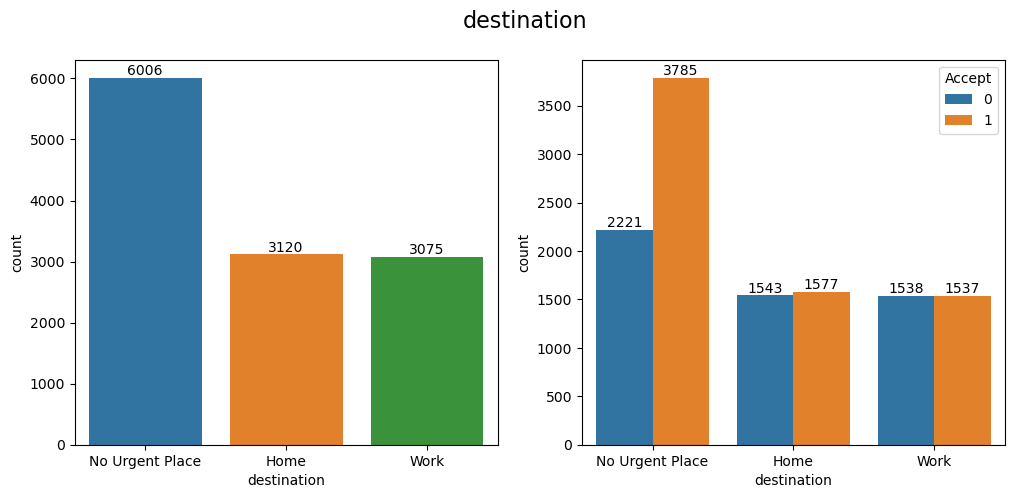

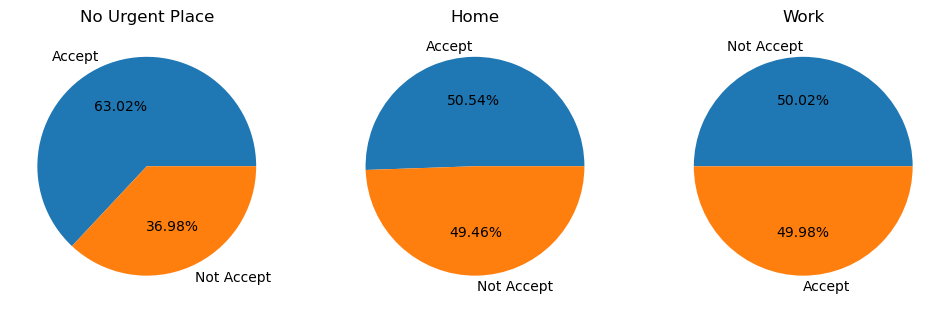

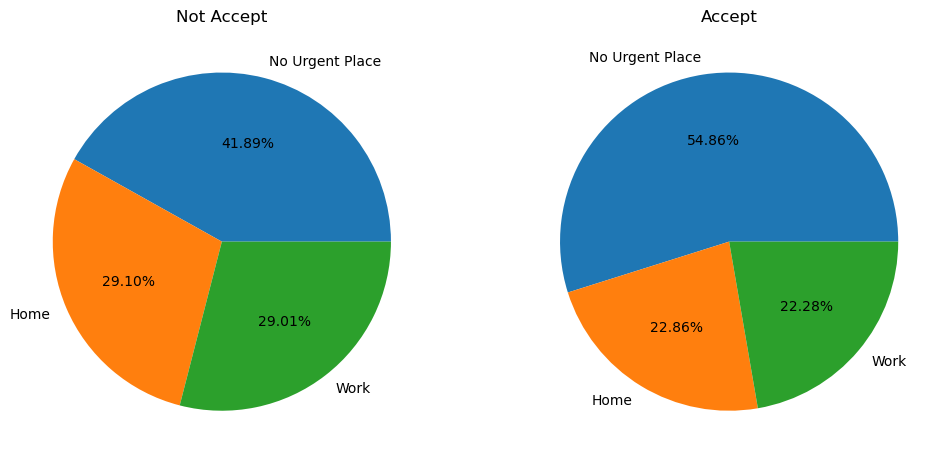

In [17]:
analysis3('destination')

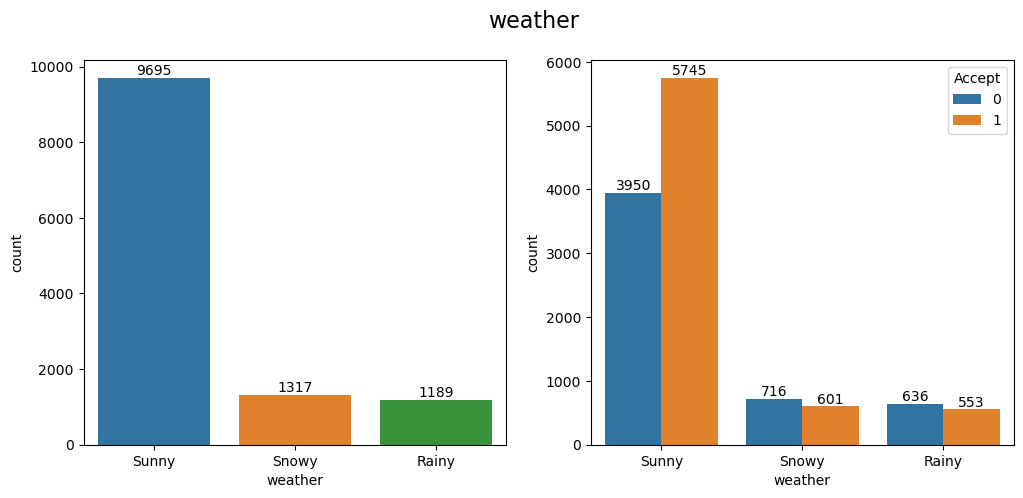

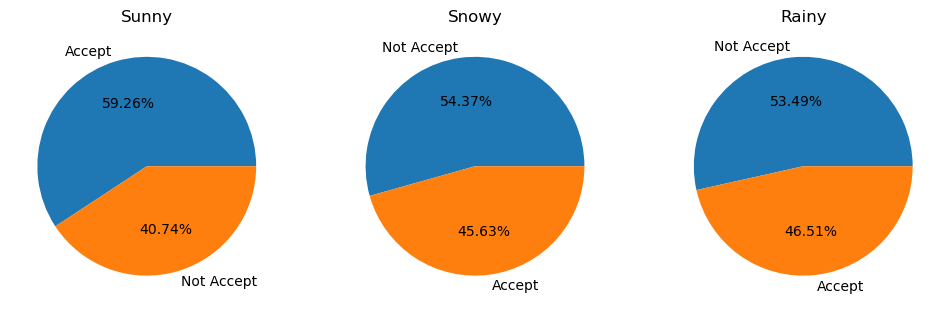

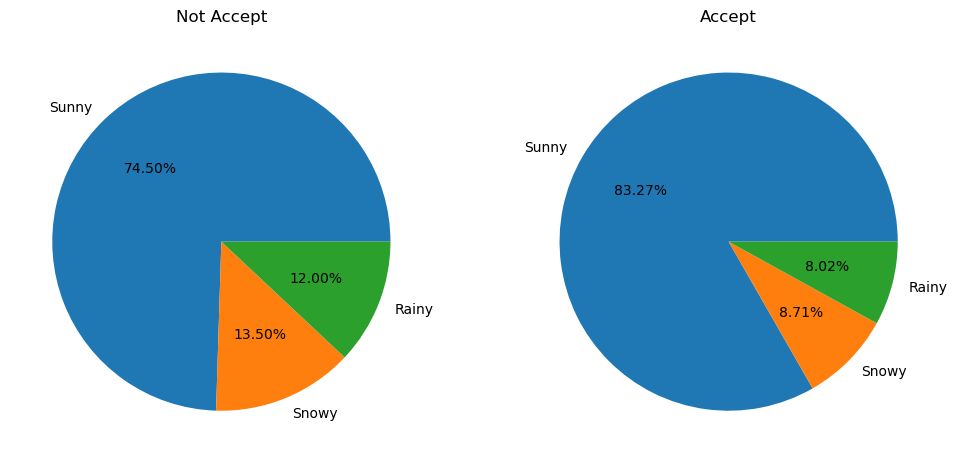

In [18]:
analysis3('weather')

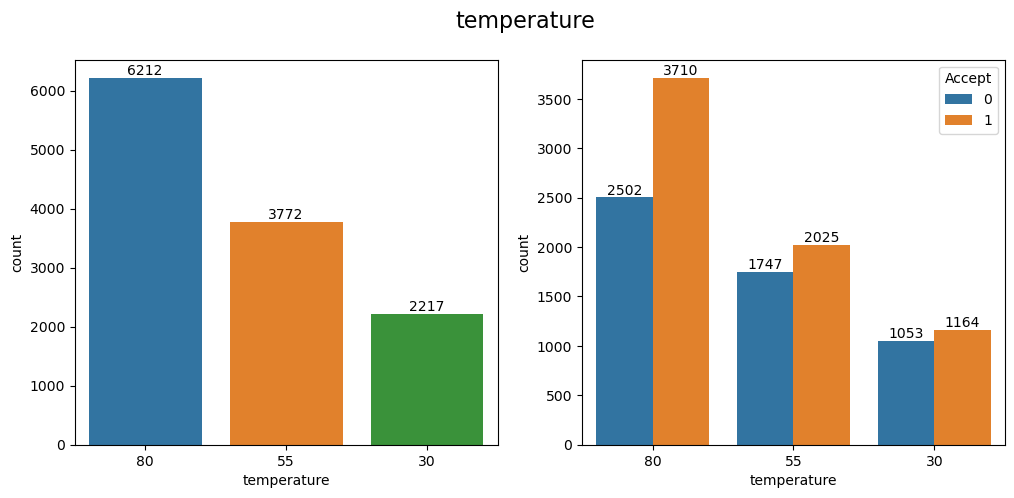

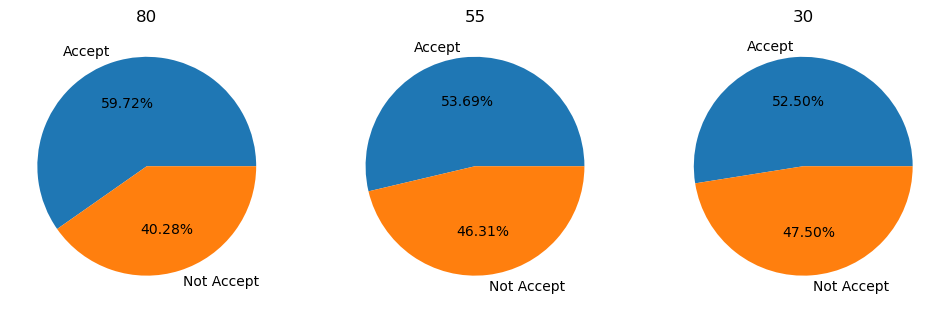

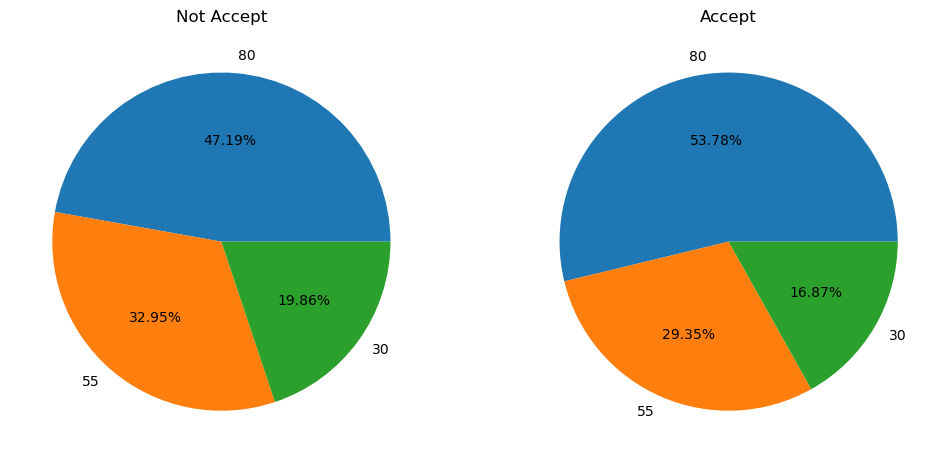

In [19]:
analysis3('temperature')

In [20]:
def analysis2(var):
    f, ax = plt.subplots(1,2, figsize=(12,5), dpi=100)
    plt.subplot(1,2,1)
    ax1 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index)
    for a in ax1.containers:
        ax1.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.subplot(1,2,2)
    ax2 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index, hue='Accept')
    for a in ax2.containers:
        ax2.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.suptitle(var, size=16)

    col1 = list(data[var].value_counts().index)
    f, ax = plt.subplots(1,2, figsize=(12,8), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data[var] == col1[0]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(col1[0])

    plt.subplot(1,2,2)
    df1 = data[data[var] == col1[1]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(col1[1])




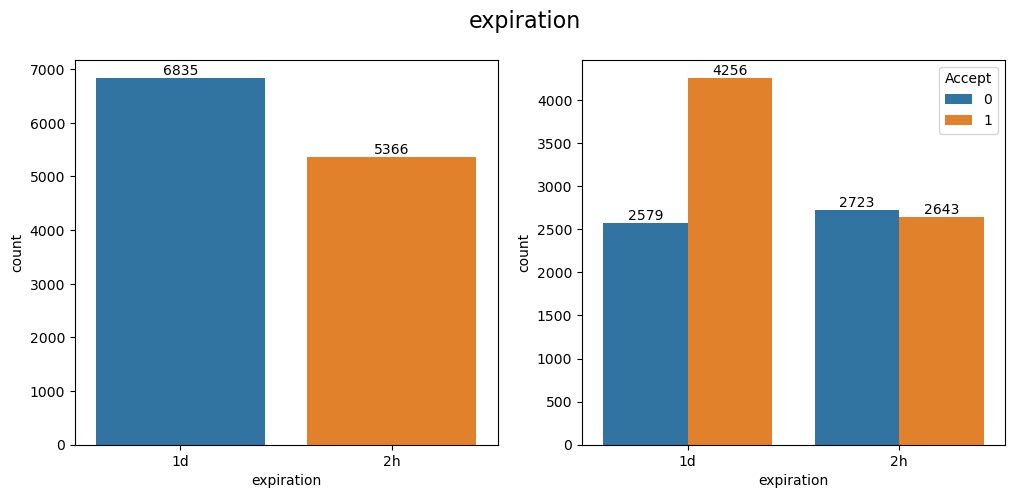

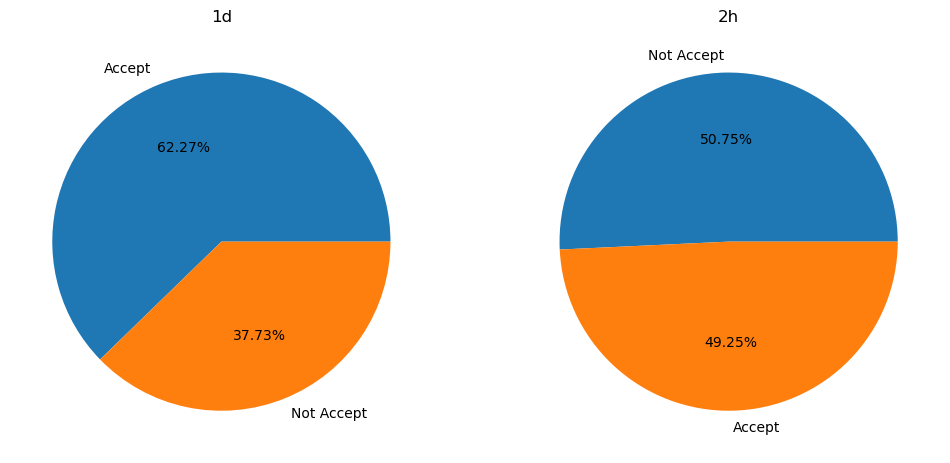

In [21]:
analysis2('expiration')

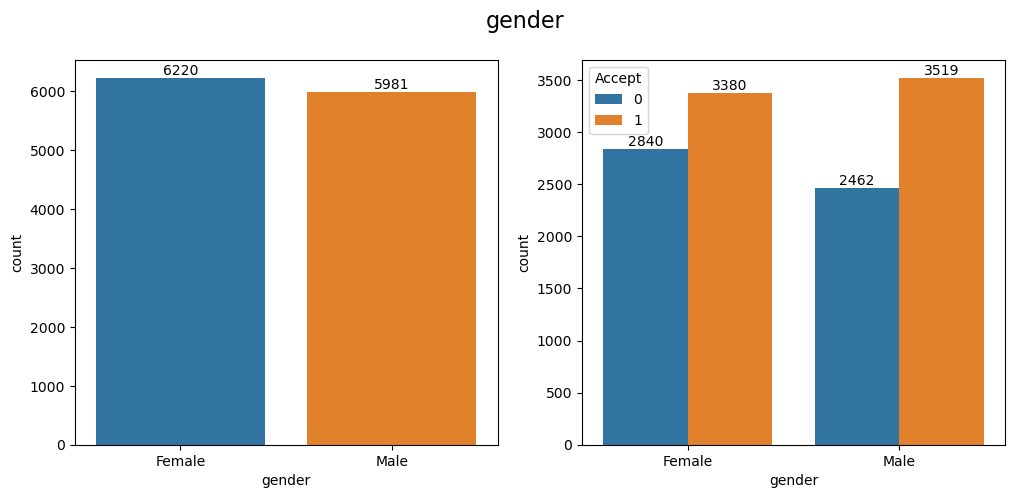

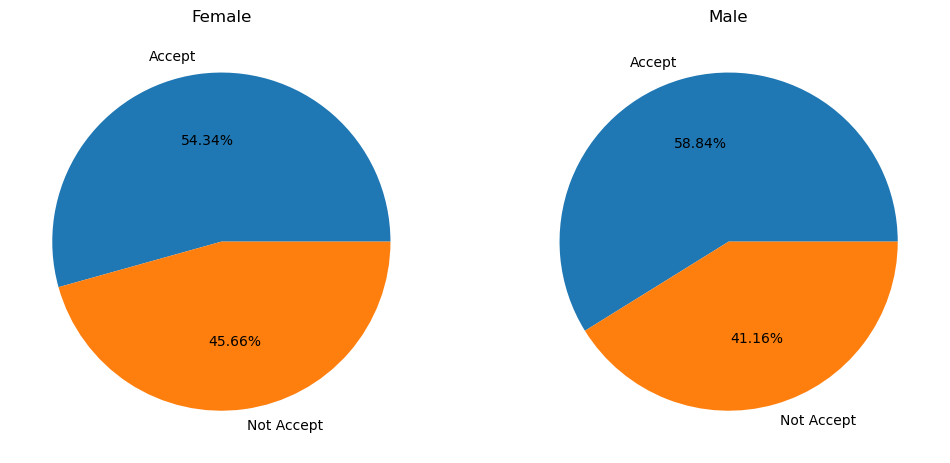

In [22]:
analysis2('gender')

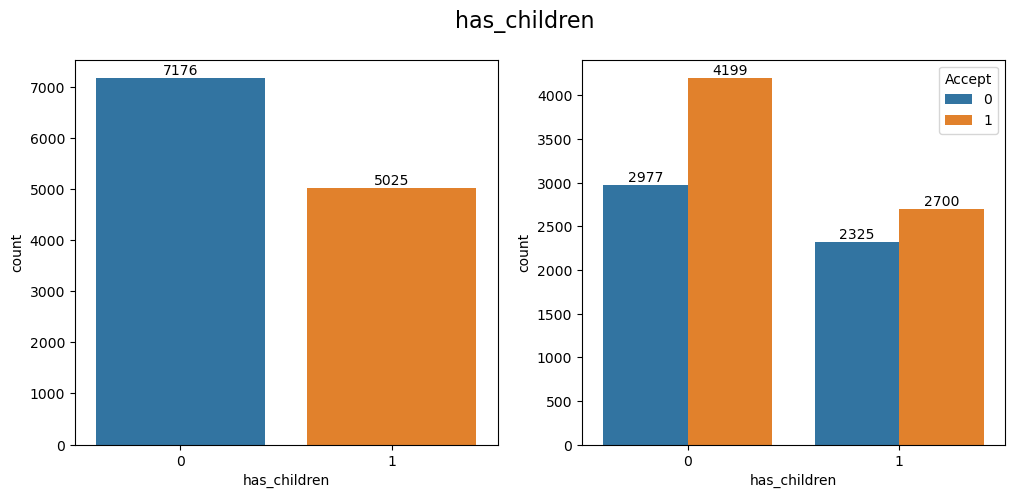

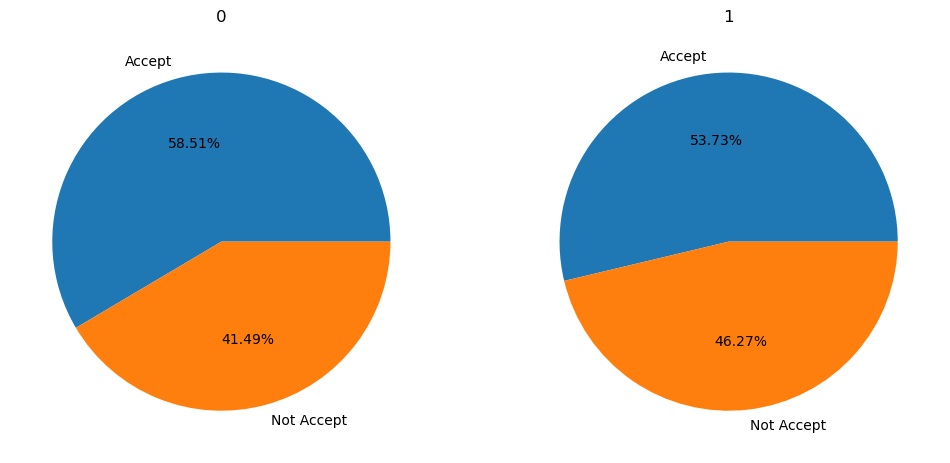

In [23]:
analysis2('has_children')

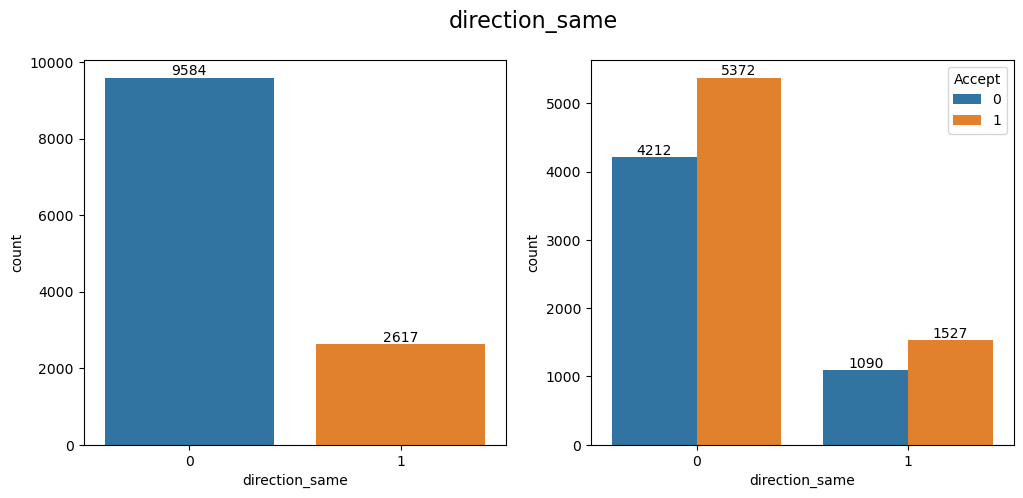

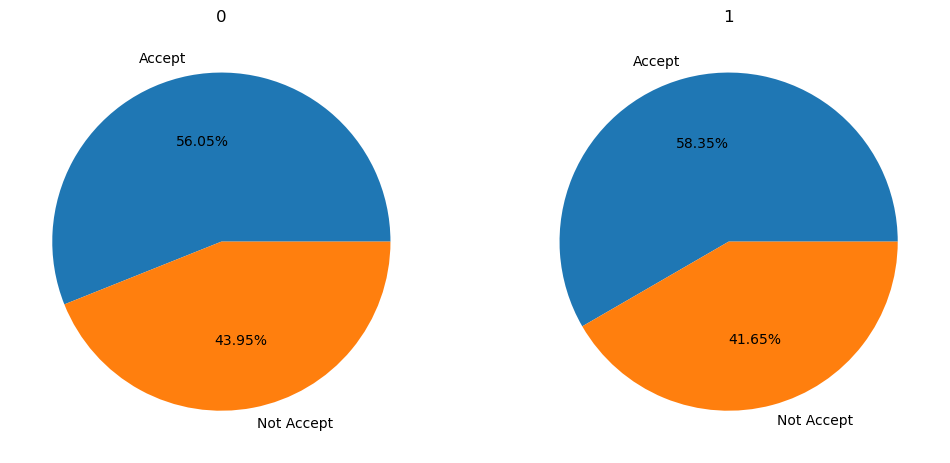

In [24]:
analysis2('direction_same')

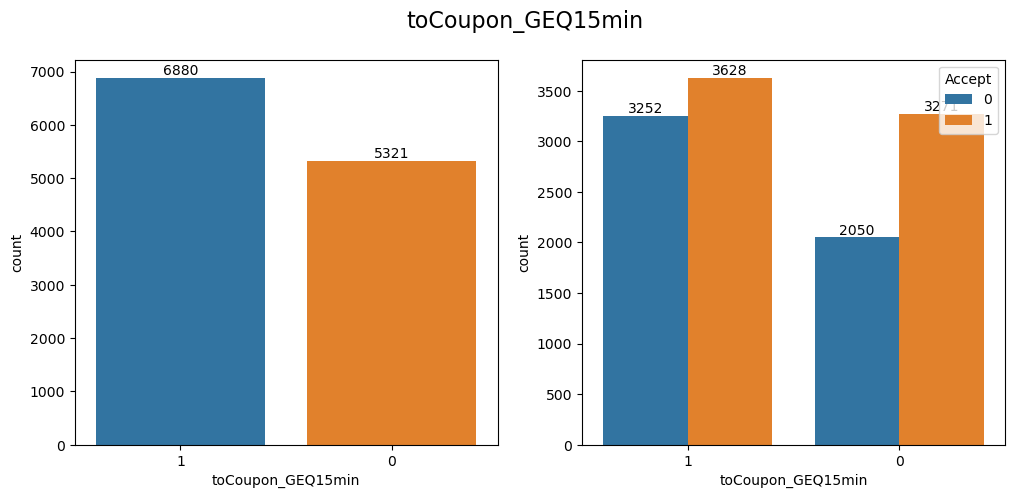

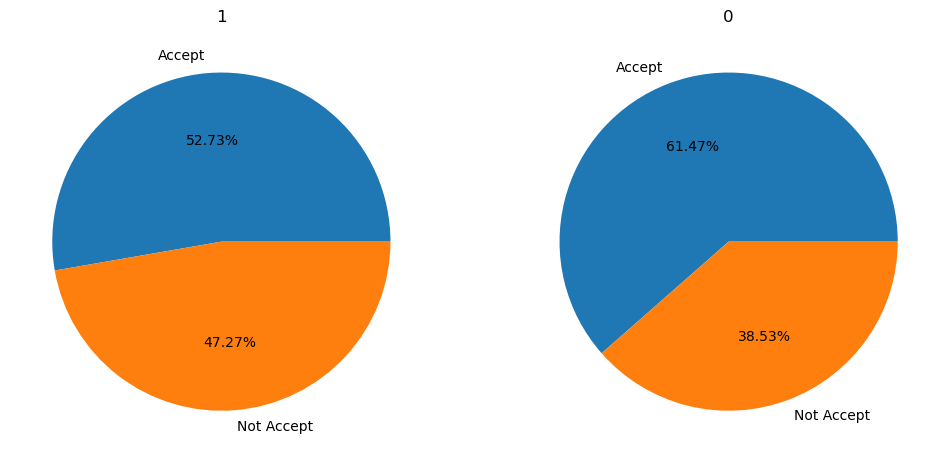

In [25]:
analysis2('toCoupon_GEQ15min')

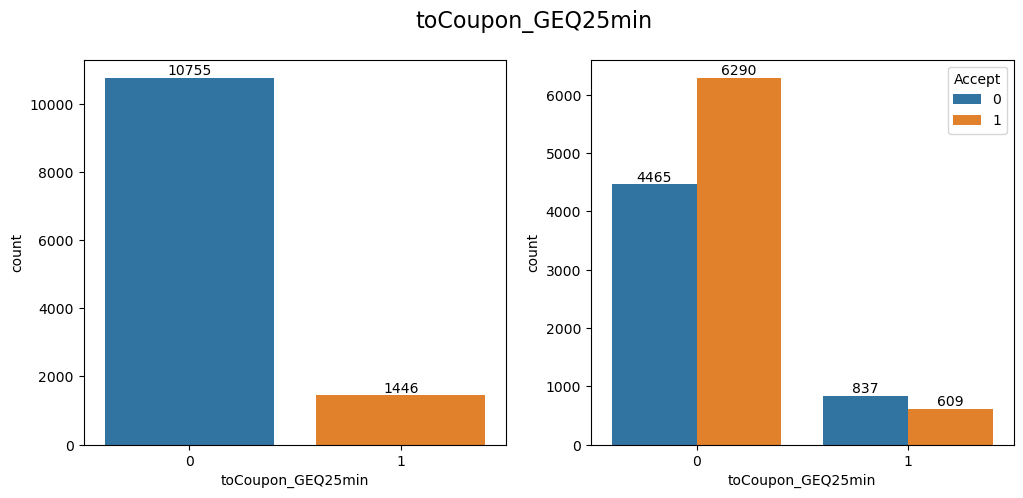

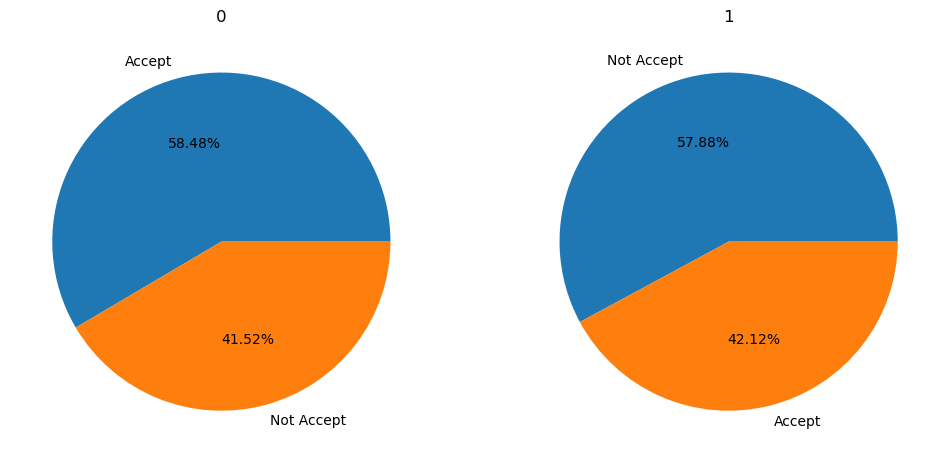

In [26]:
analysis2('toCoupon_GEQ25min')

In [27]:
def analysis4(var):
    f, ax = plt.subplots(1,2, figsize=(12,5), dpi=100)
    plt.subplot(1,2,1)
    ax1 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index)
    for a in ax1.containers:
        ax1.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.subplot(1,2,2)
    ax2 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index, hue='Accept')
    for a in ax2.containers:
        ax2.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.suptitle(var, size=16)

    f, ax = plt.subplots(2,2, figsize= (12,8), dpi= 100)
    value = list(data[var].value_counts().index)
    ind = 0
    for i in range(2):
        for j in range(2):
            df1 = data[data[var] == value[ind]]
            ax[i,j].pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
#             print(plt.title(value[ind]))
            ind = ind + 1
        plt.tight_layout()
    plt.show()


    f, ax = plt.subplots(1,2, figsize=(12,8), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data['Accept'] == 0]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Not Accept')

    plt.subplot(1,2,2)
    df1 = data[data['Accept'] == 1]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Accept')



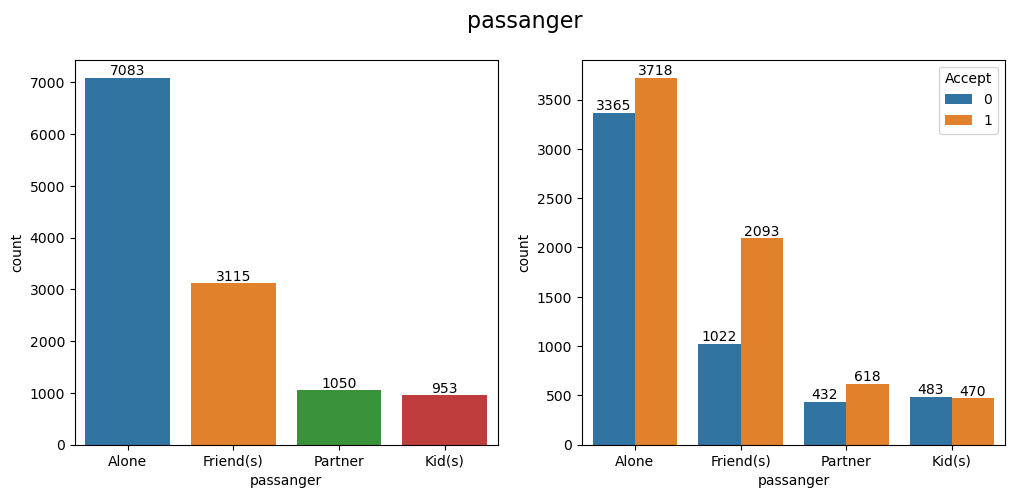

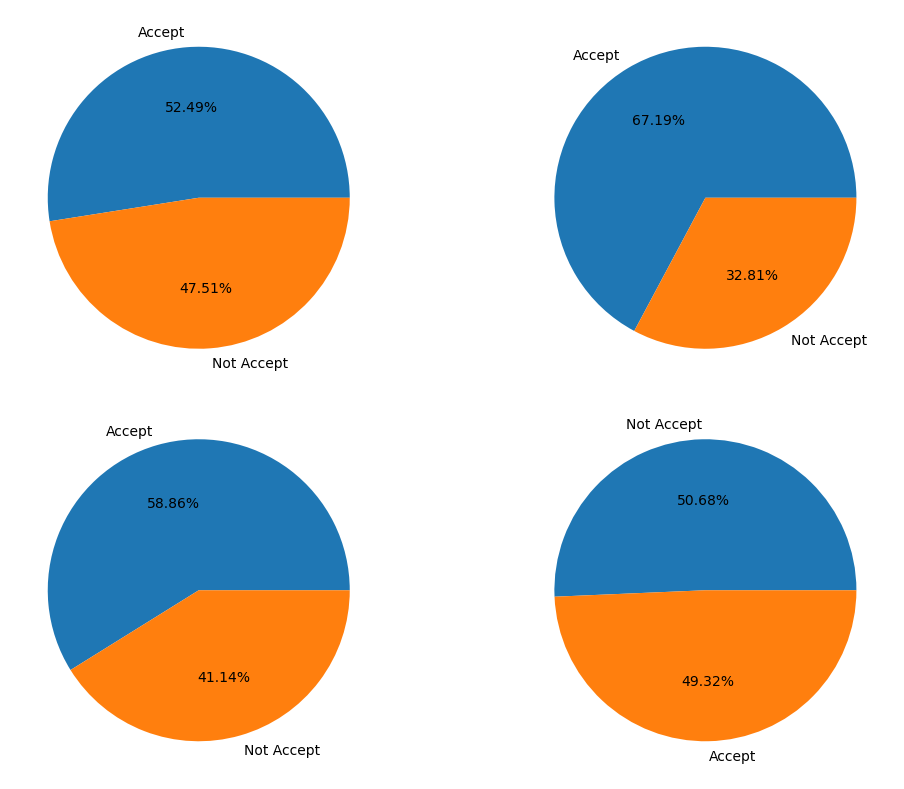

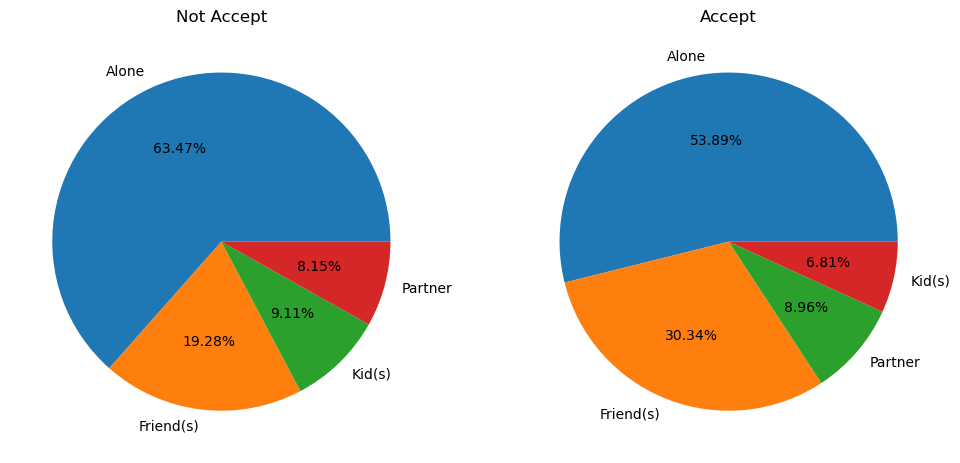

In [28]:
analysis4('passanger')

In [29]:
def analysis5(var):
    f, ax = plt.subplots(2,1, figsize=(10,16), dpi=100)
    plt.subplot(2,1,1)
    ax1 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index)
    for a in ax1.containers:
        ax1.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.subplot(2,1,2)
    ax2 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index, hue='Accept')
    for a in ax2.containers:
        ax2.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.suptitle(var, size=16)

    col = list(data[var].value_counts().index)
    arr1 = col[0:3]
#     print(arr1)
    arr2 = col[3:]
    f, ax = plt.subplots(1,3, figsize=(12,8), dpi=100)
    plt.subplot(1,3,1)
    df1 = data[data[var] == arr1[0]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(arr1[0])

    plt.subplot(1,3,2)
    df1 = data[data[var] == arr1[1]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(arr1[1])

    plt.subplot(1,3,3)
    df1 = data[data[var] == arr1[2]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(arr1[2])

    f, ax = plt.subplots(1,2, figsize=(8,4), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data[var] == arr2[0]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(arr2[0])

    plt.subplot(1,2,2)
    df1 = data[data[var] == arr2[1]]
    plt.pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
    plt.title(arr2[1])




    f, ax = plt.subplots(1,2, figsize=(12,8), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data['Accept'] == 0]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Not Accept')

    plt.subplot(1,2,2)
    df1 = data[data['Accept'] == 1]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Accept')



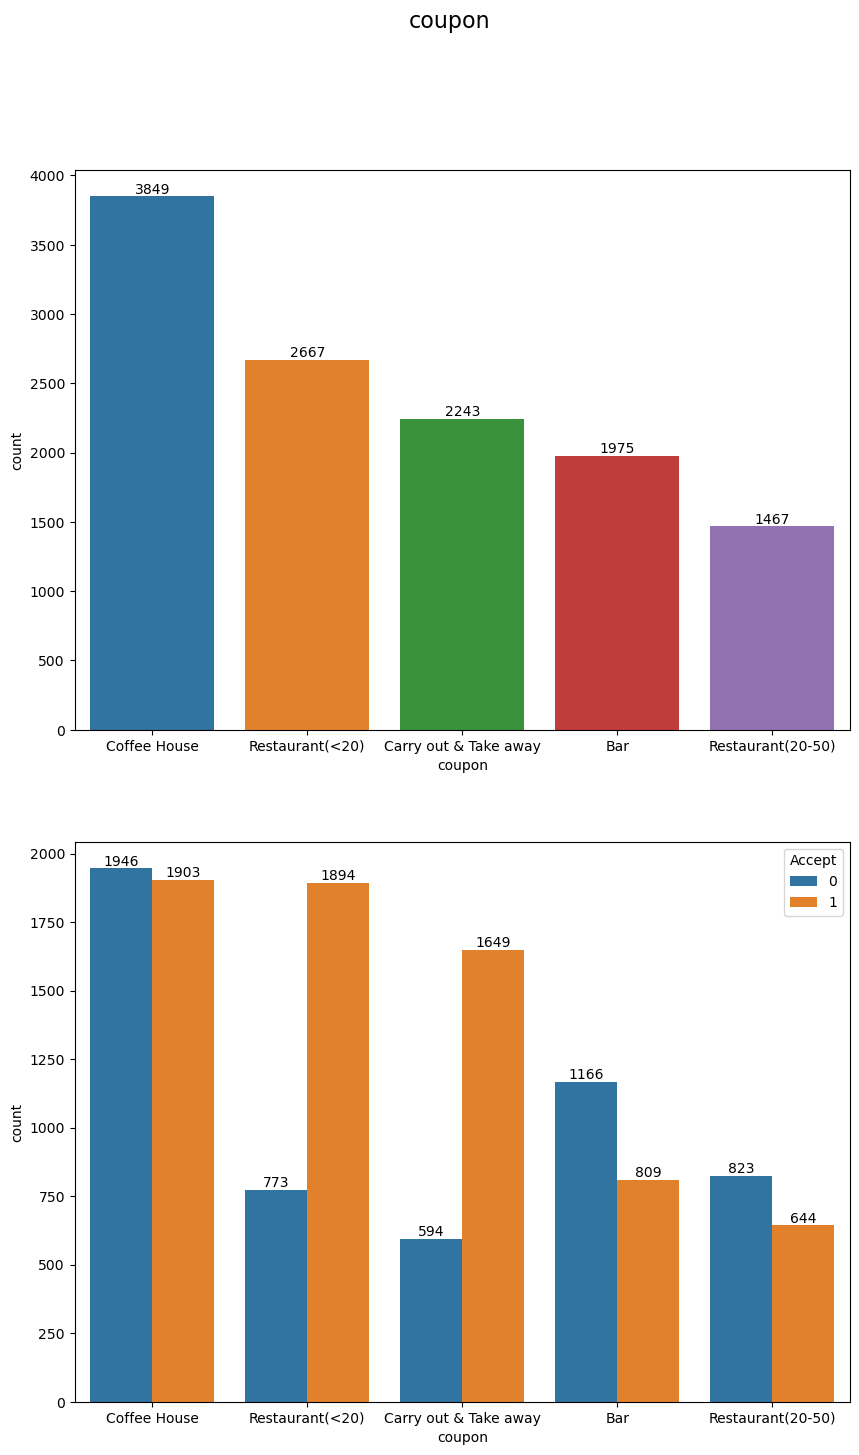

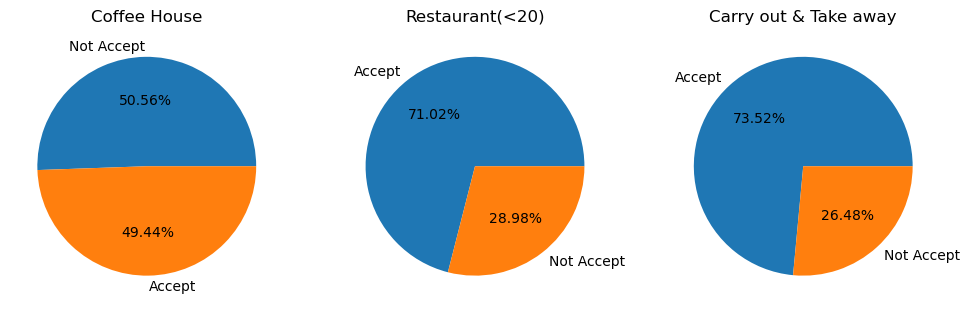

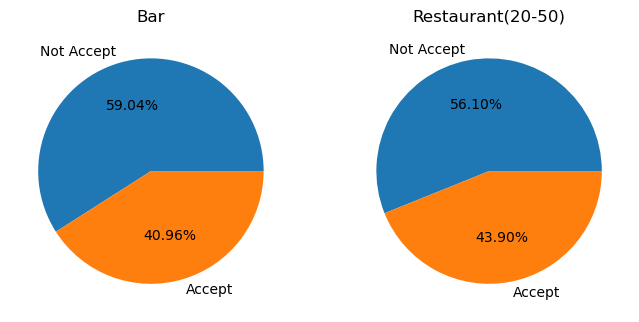

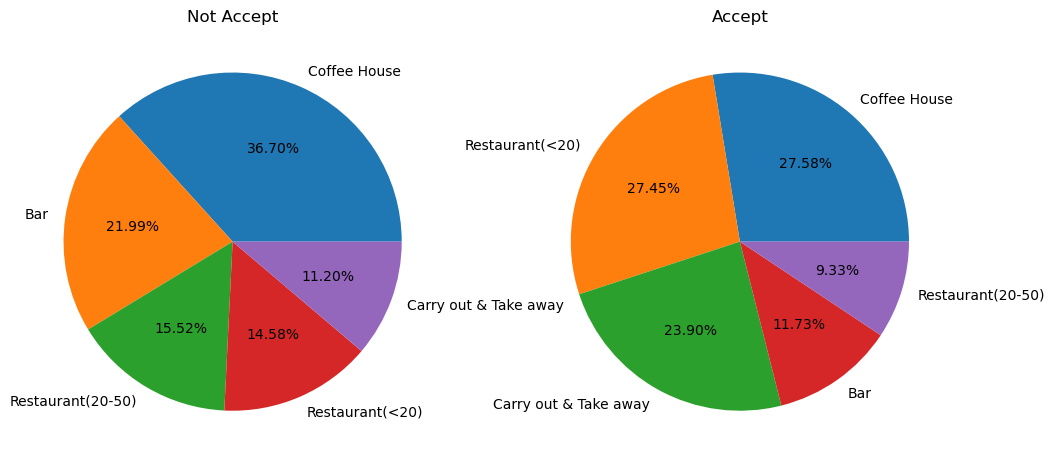

In [30]:
analysis5('coupon')

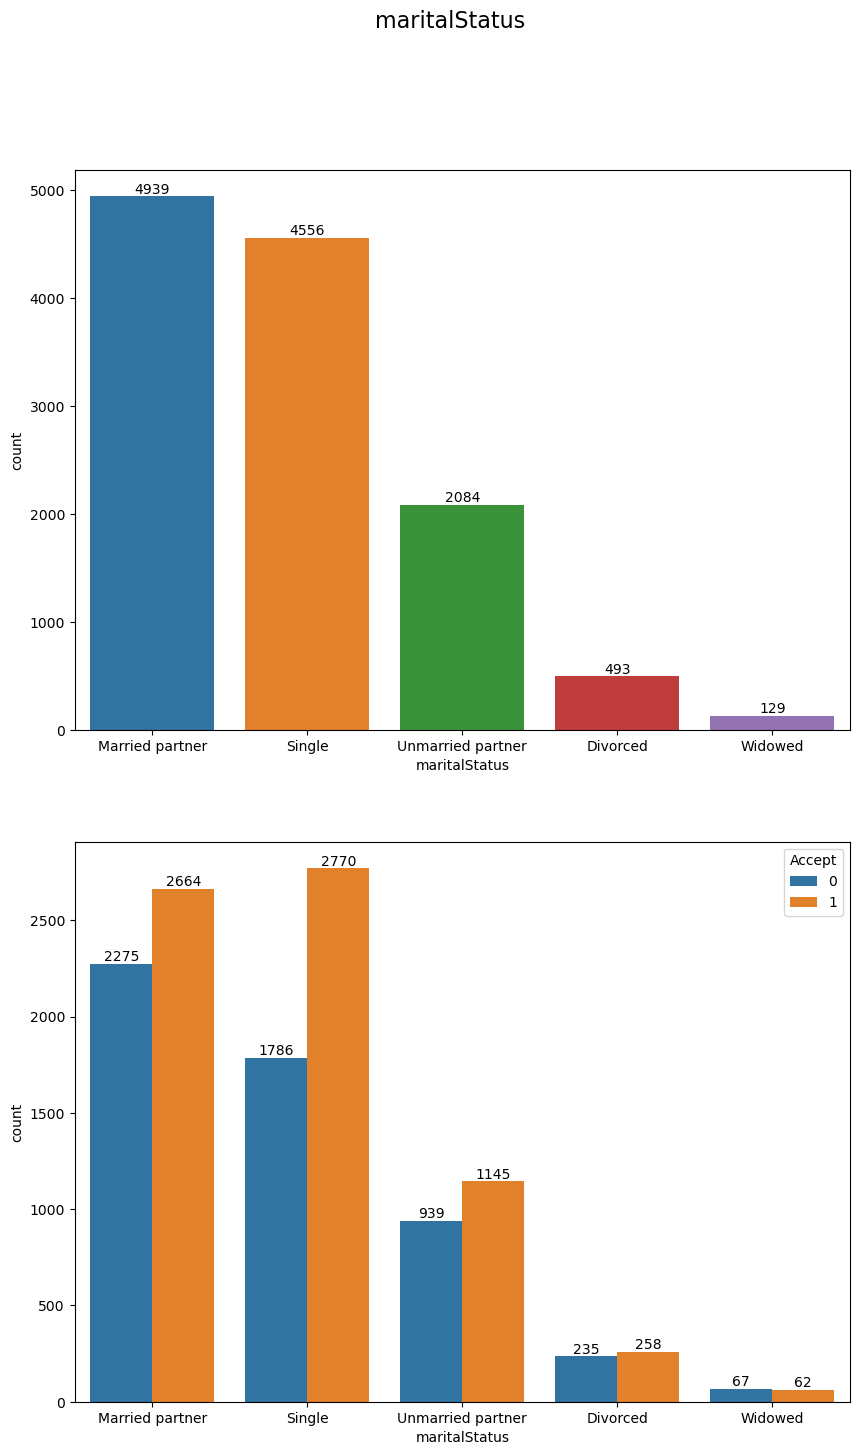

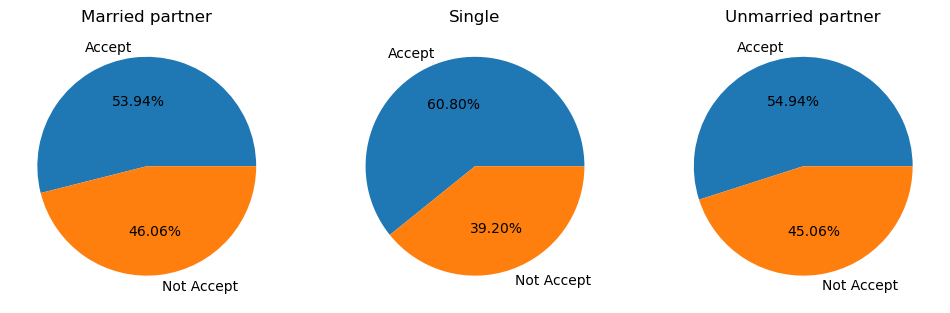

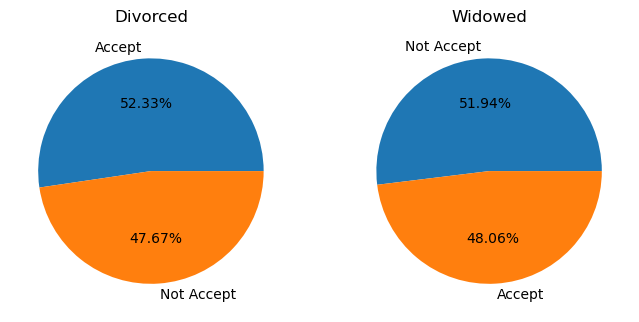

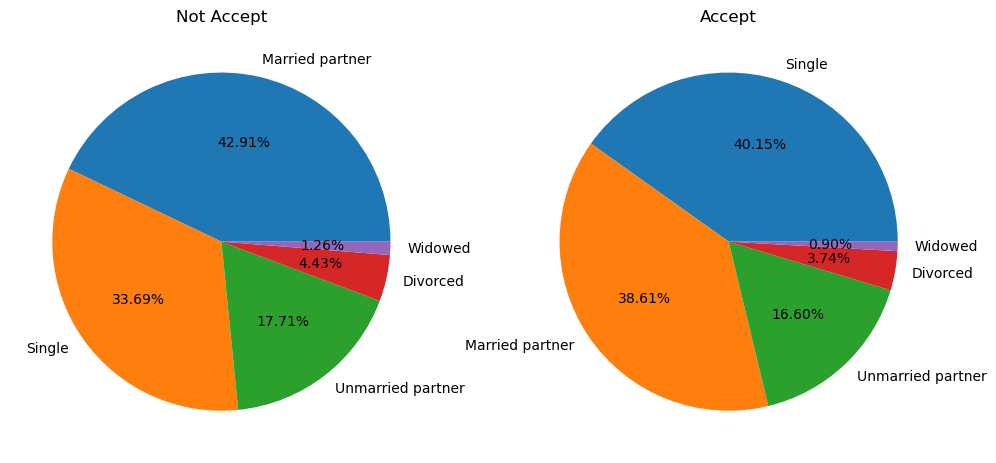

In [31]:
analysis5('maritalStatus')

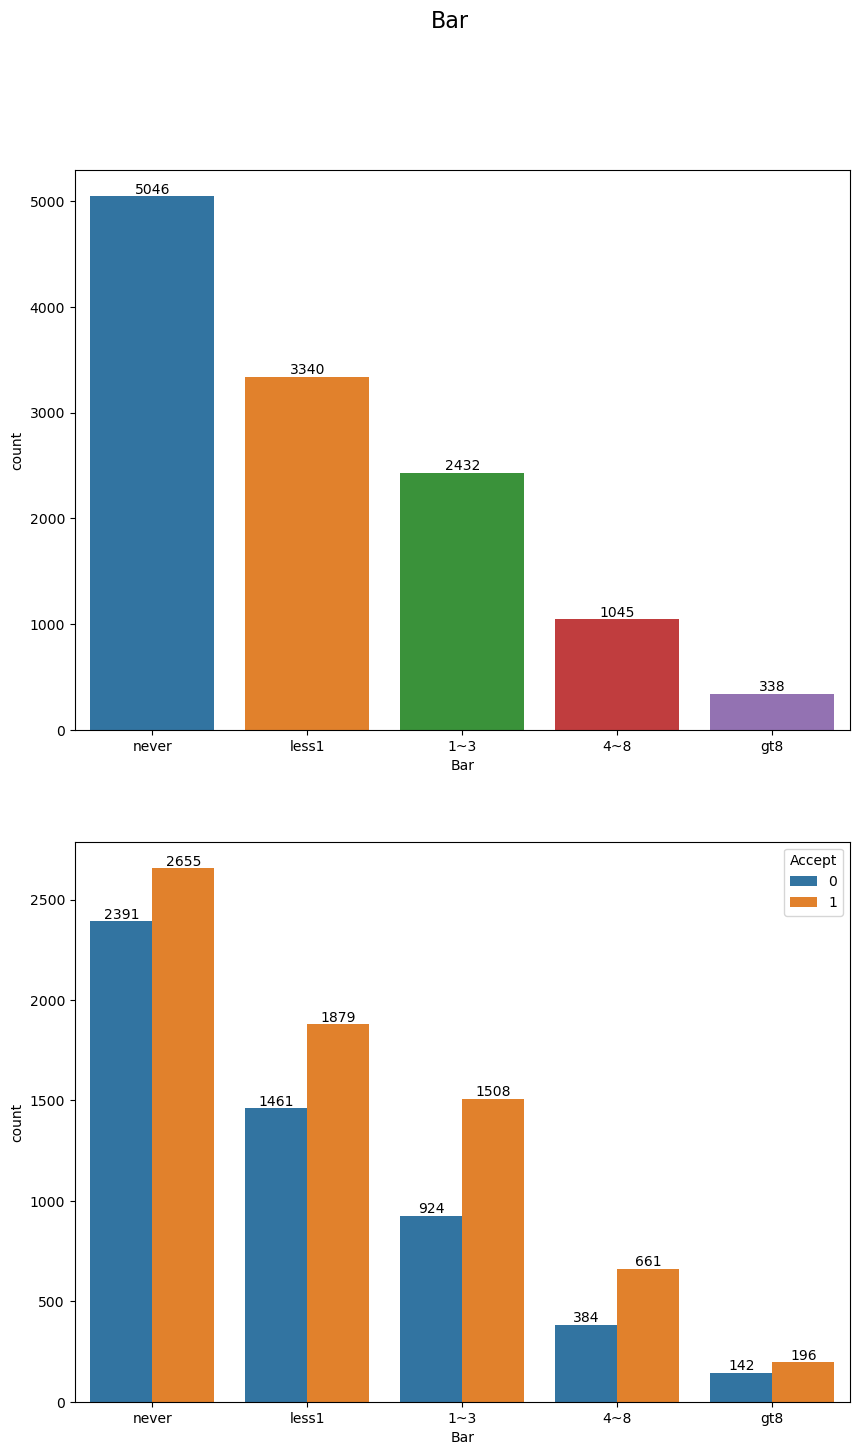

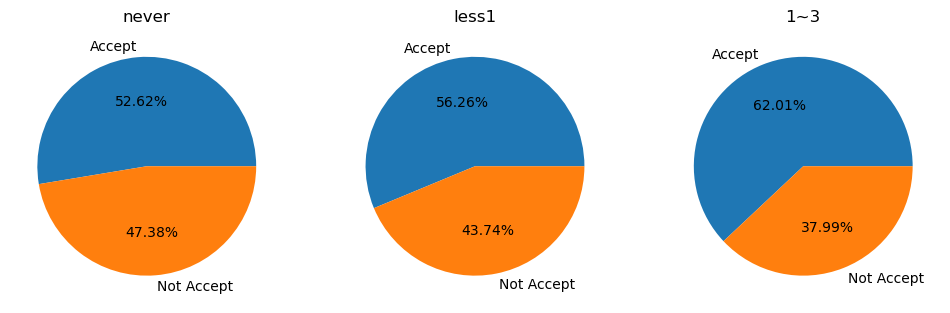

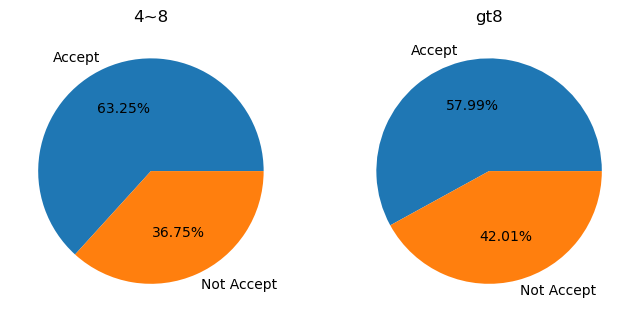

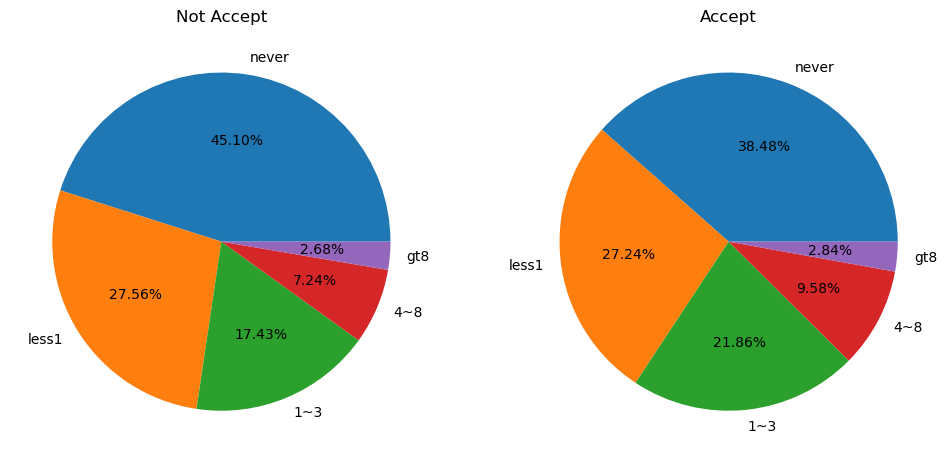

In [32]:
analysis5('Bar')
#

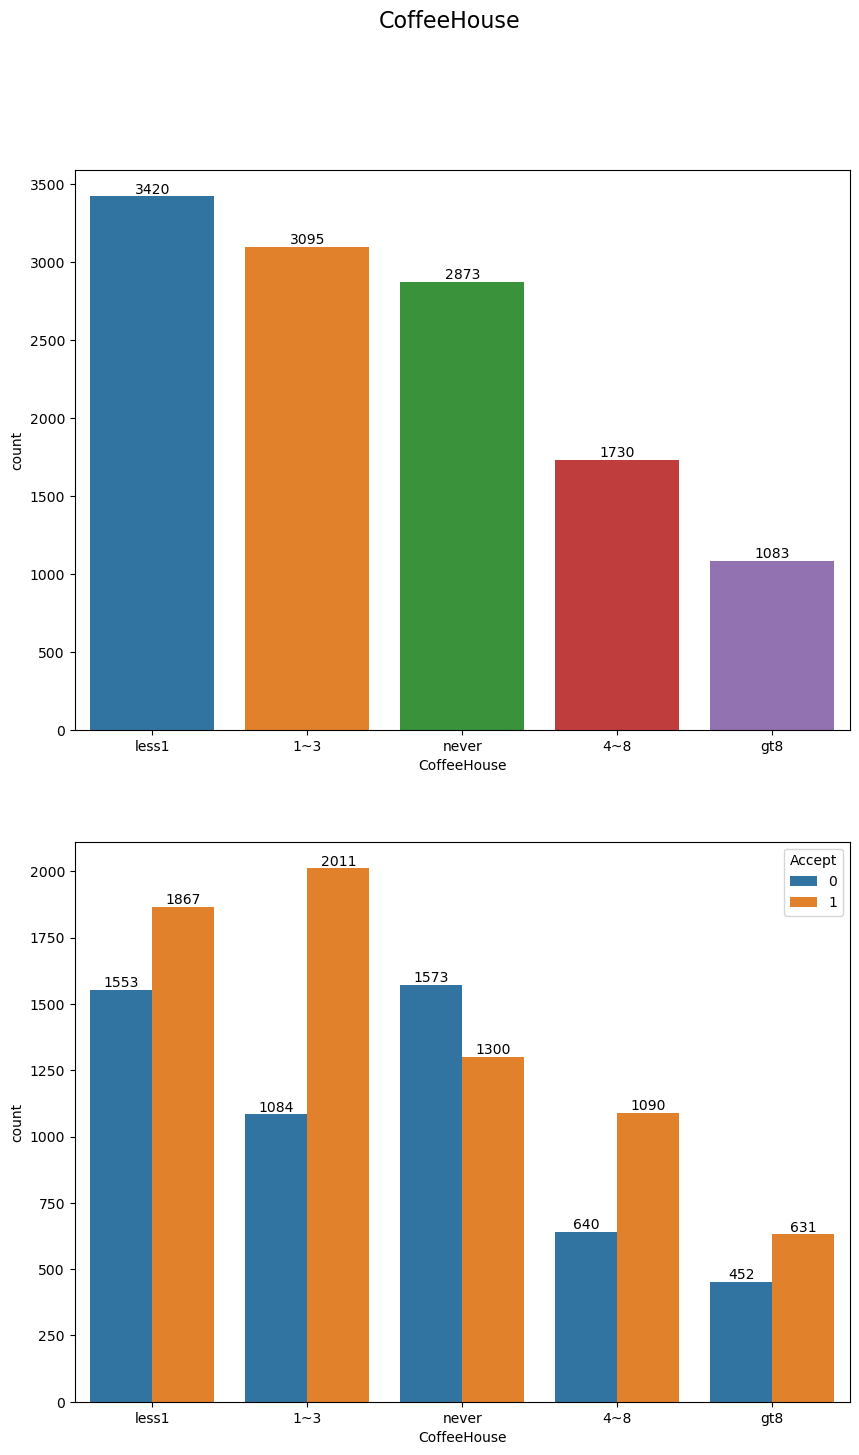

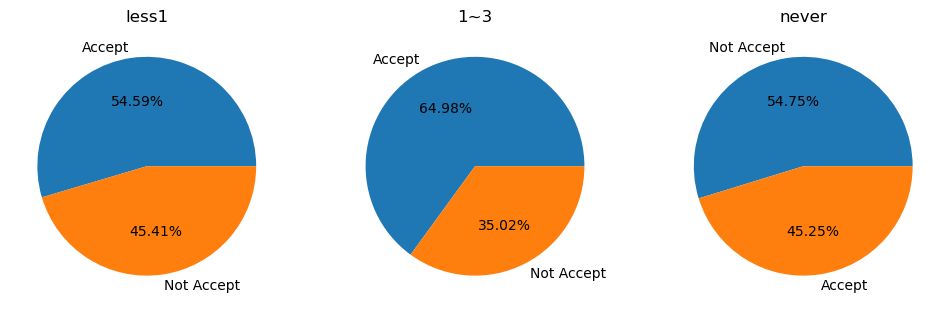

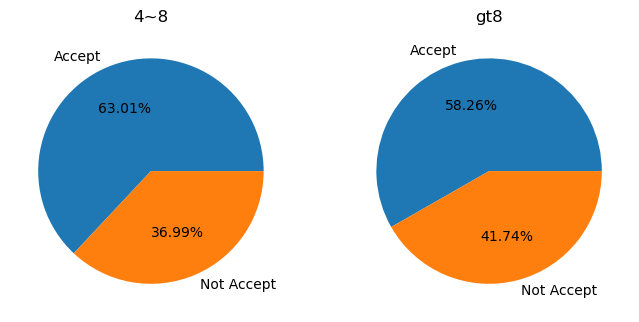

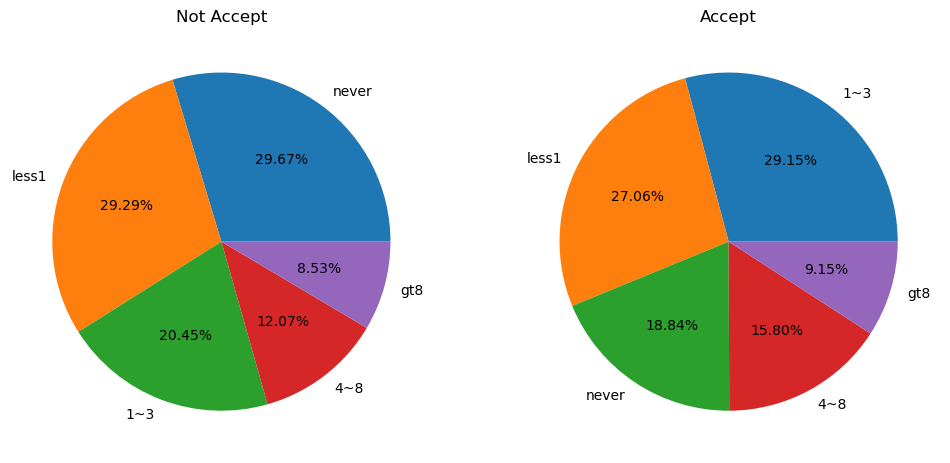

In [33]:
analysis5('CoffeeHouse')

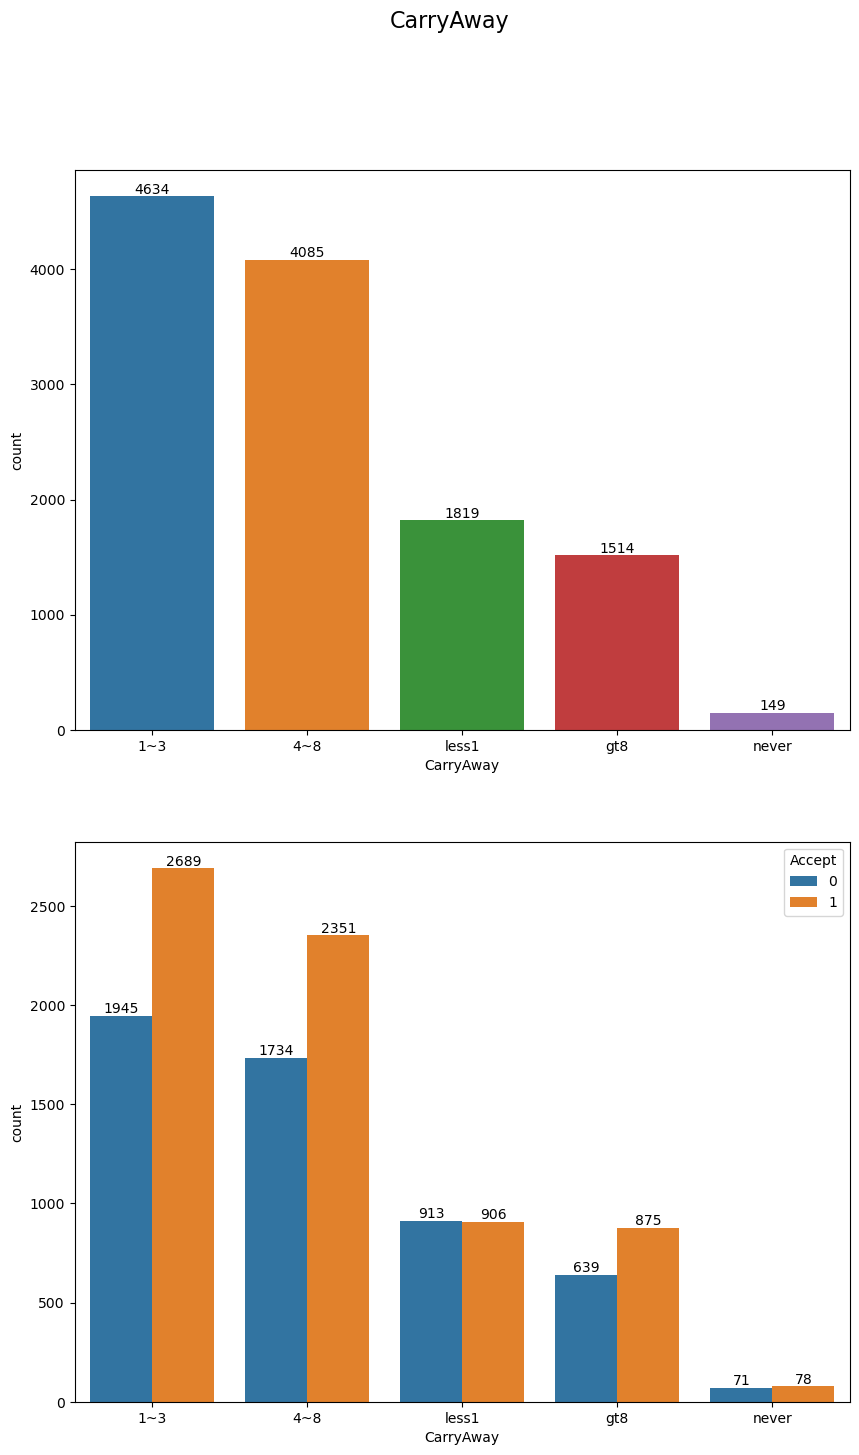

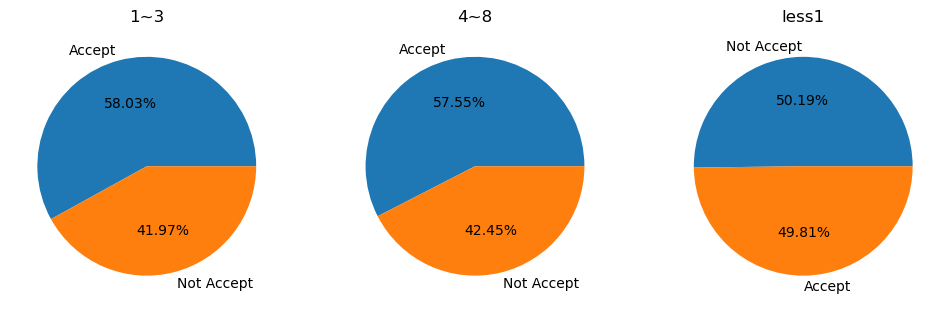

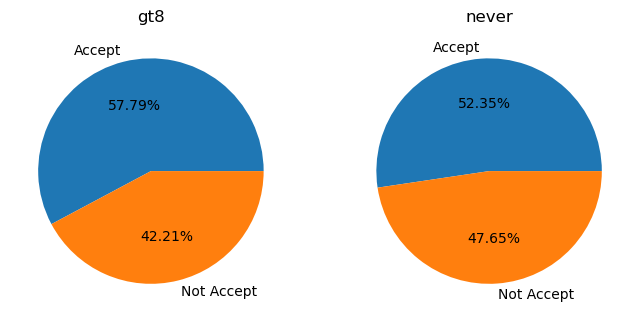

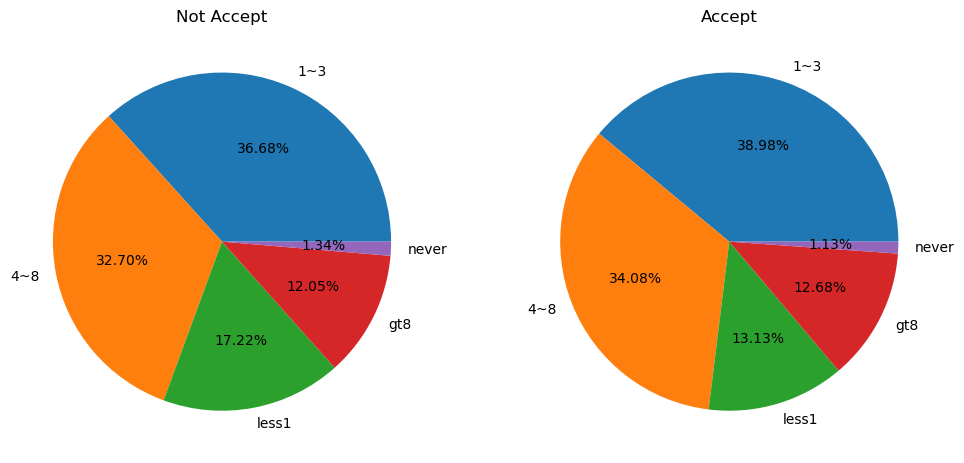

In [34]:
analysis5('CarryAway')

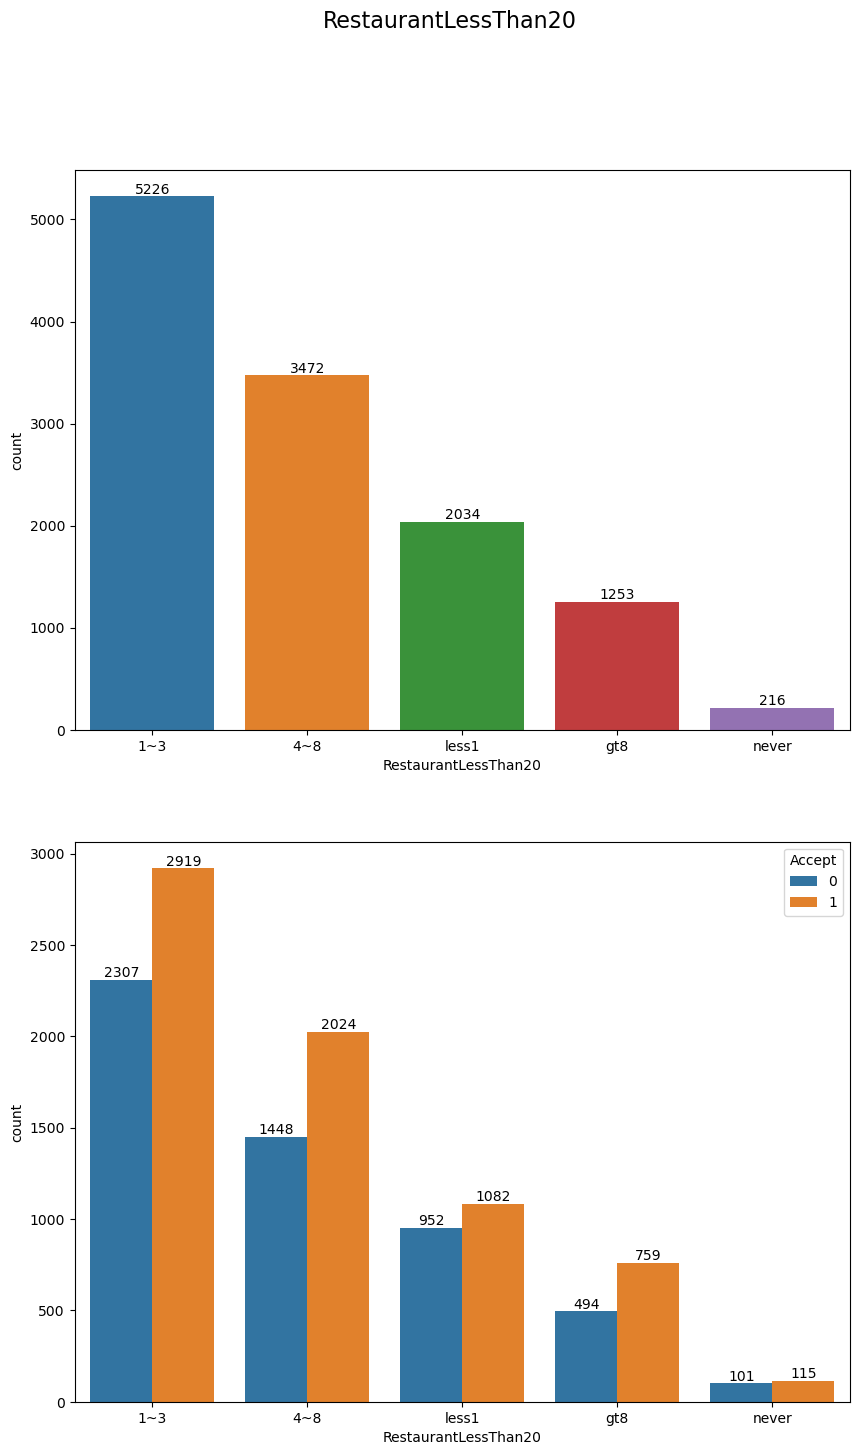

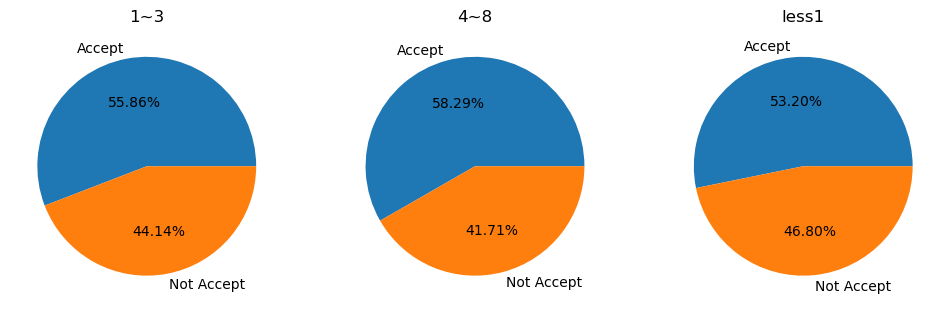

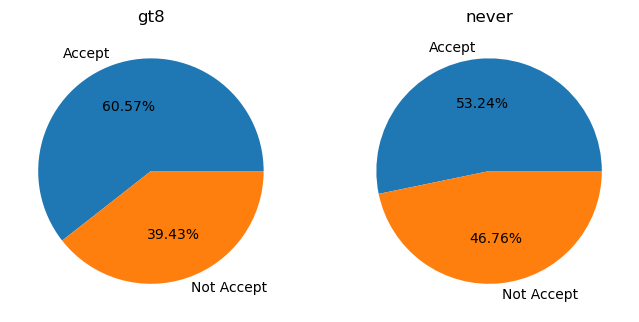

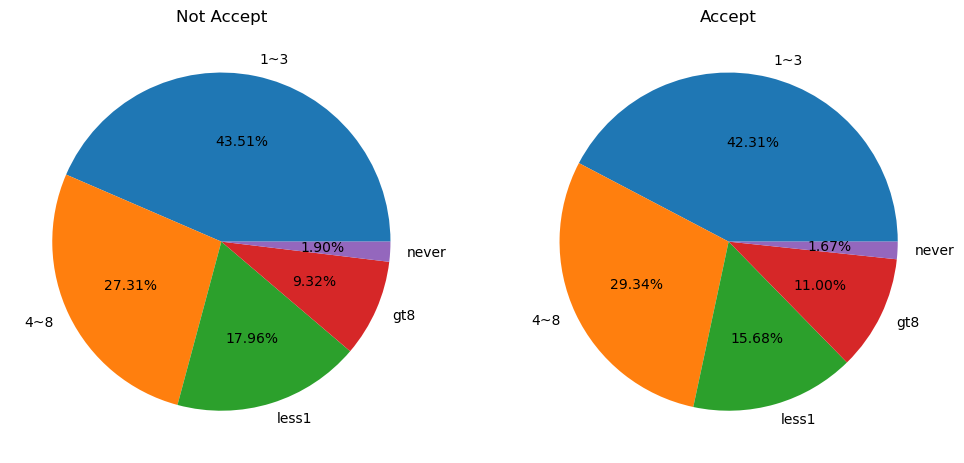

In [35]:
analysis5('RestaurantLessThan20')

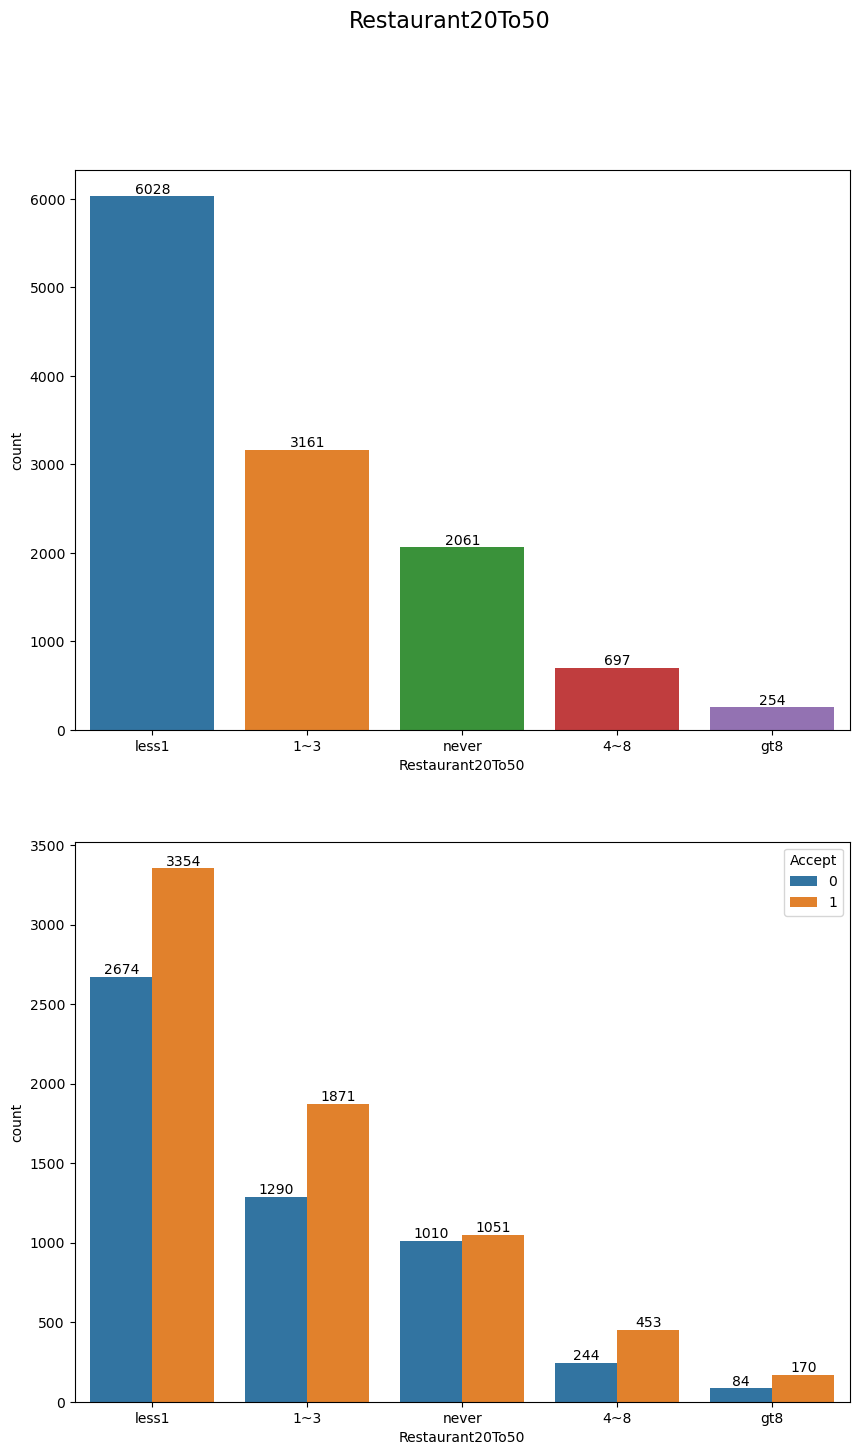

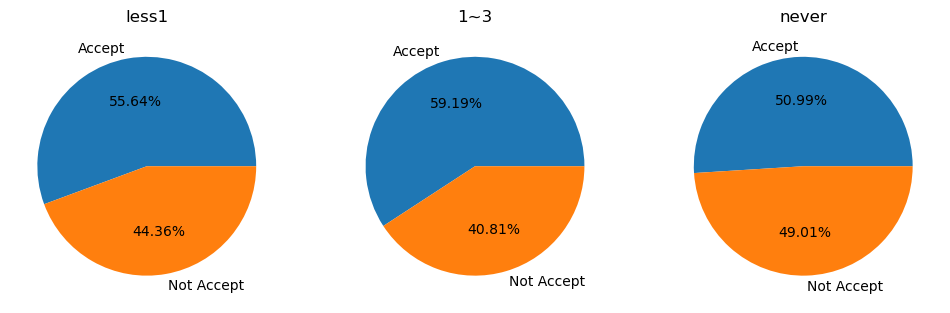

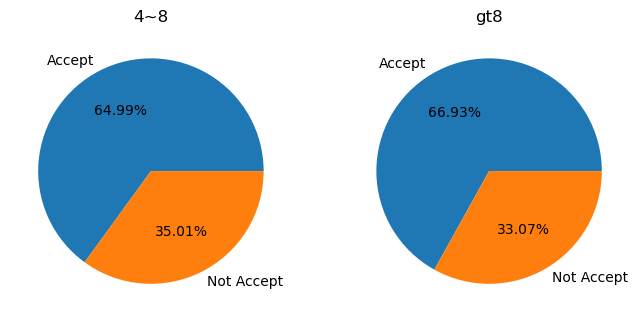

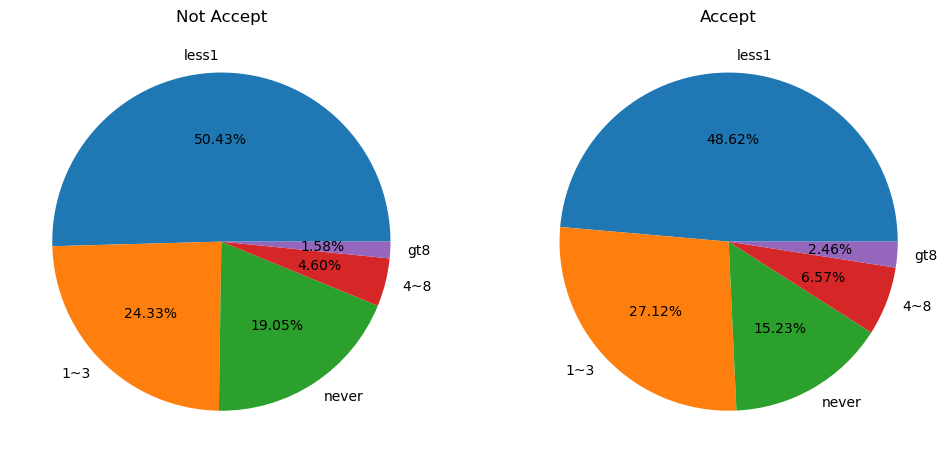

In [36]:
analysis5('Restaurant20To50')

In [37]:
def analysis6(var):
    f, ax = plt.subplots(2,1, figsize=(16,20), dpi=100)
    plt.subplot(2,1,1)
    ax1 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index)
    for a in ax1.containers:
        ax1.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.subplot(2,1,2)
    ax2 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index, hue='Accept')
    for a in ax2.containers:
        ax2.bar_label(a, fmt='%d', label_type='edge', color='black')


    plt.suptitle(var, size=16)

    f, ax = plt.subplots(2,3, figsize= (12,8), dpi= 100)
    value = list(data[var].value_counts().index)
    ind = 0
    for i in range(2):
        for j in range(3):
            df1 = data[data[var] == value[ind]]
            ax[i,j].pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
#             plt.title(value[ind])
            ind = ind + 1
        plt.tight_layout()
    plt.show()


    f, ax = plt.subplots(1,2, figsize=(12,8), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data['Accept'] == 0]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Not Accept')

    plt.subplot(1,2,2)
    df1 = data[data['Accept'] == 1]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Accept')



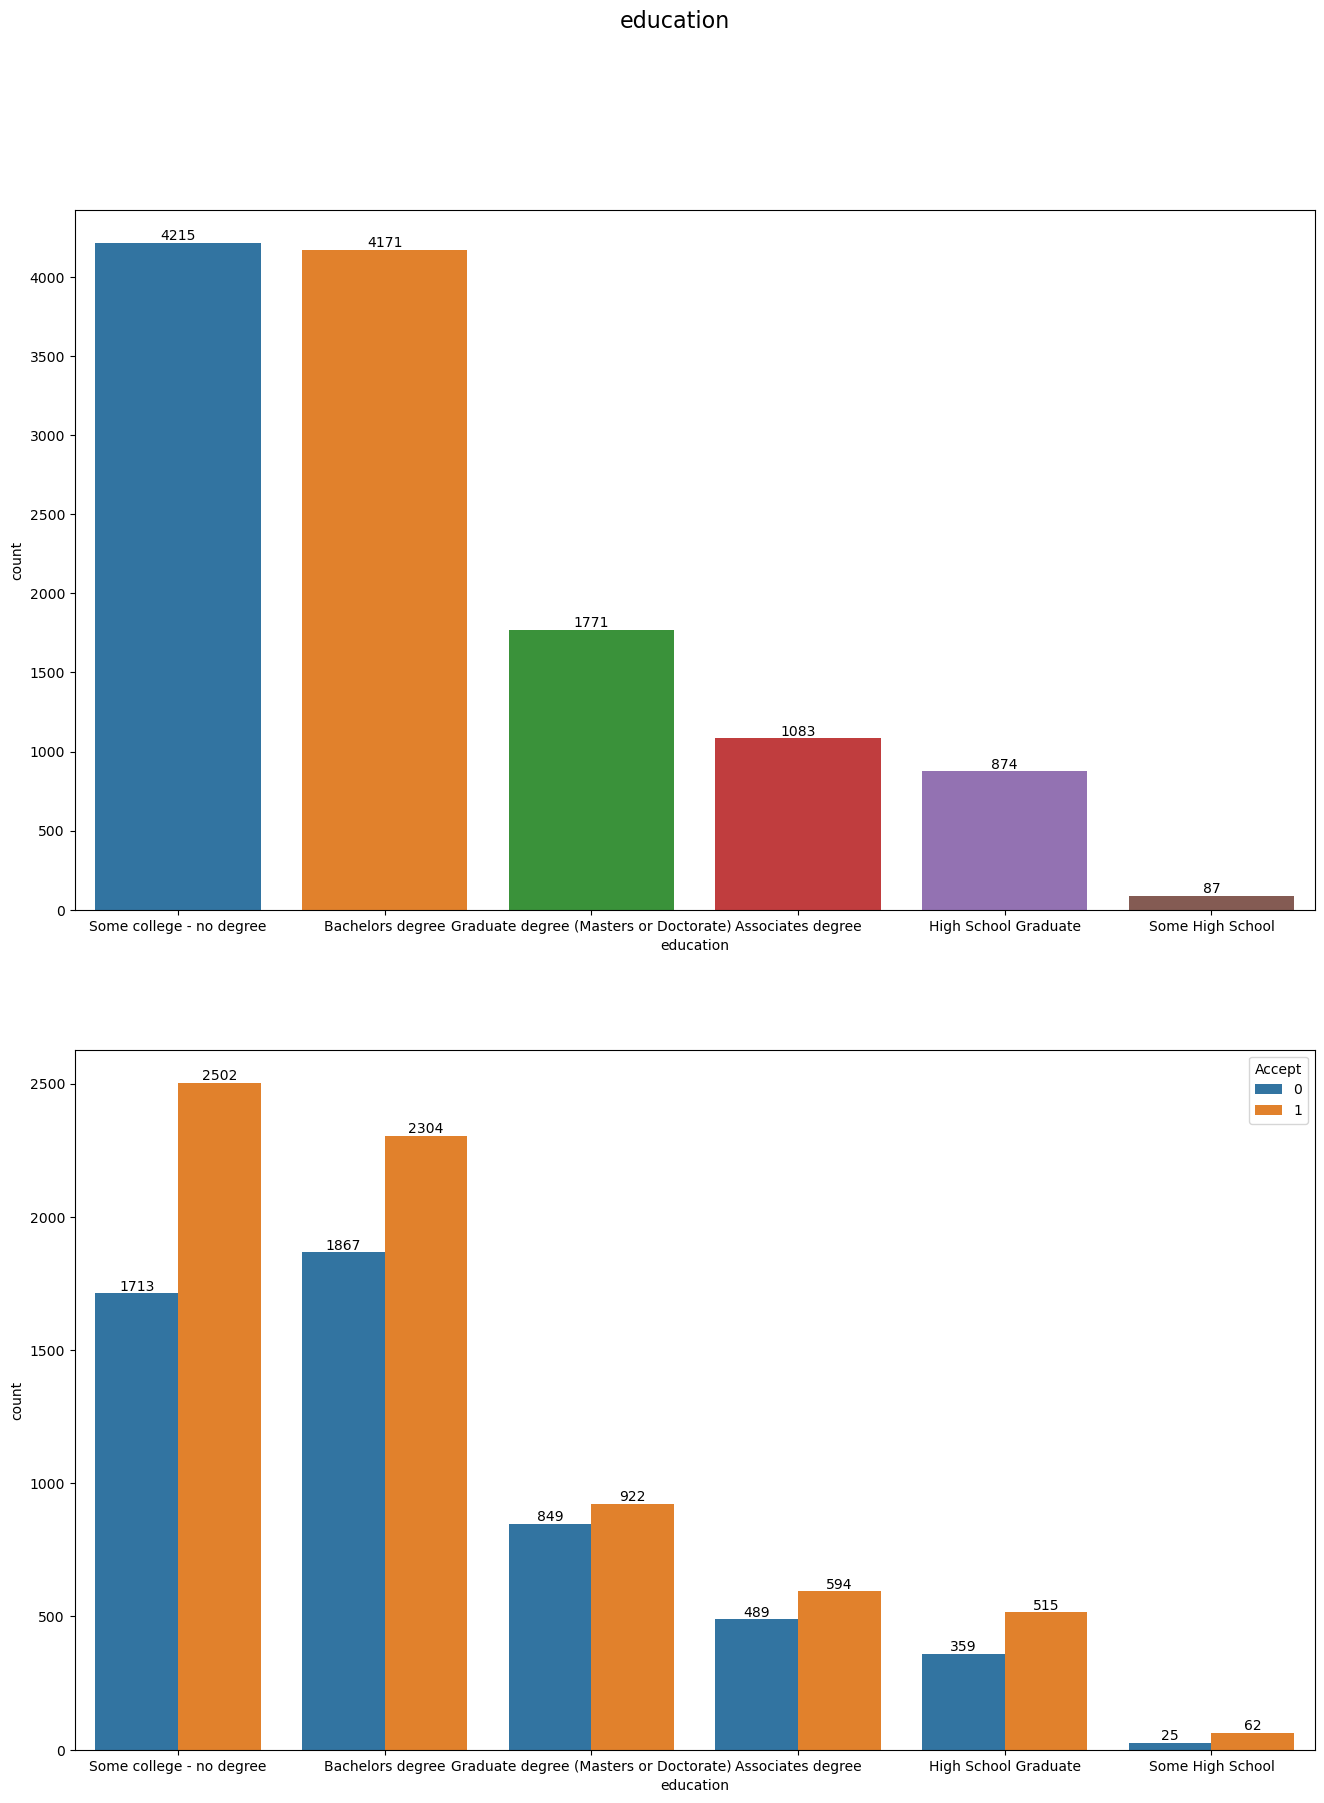

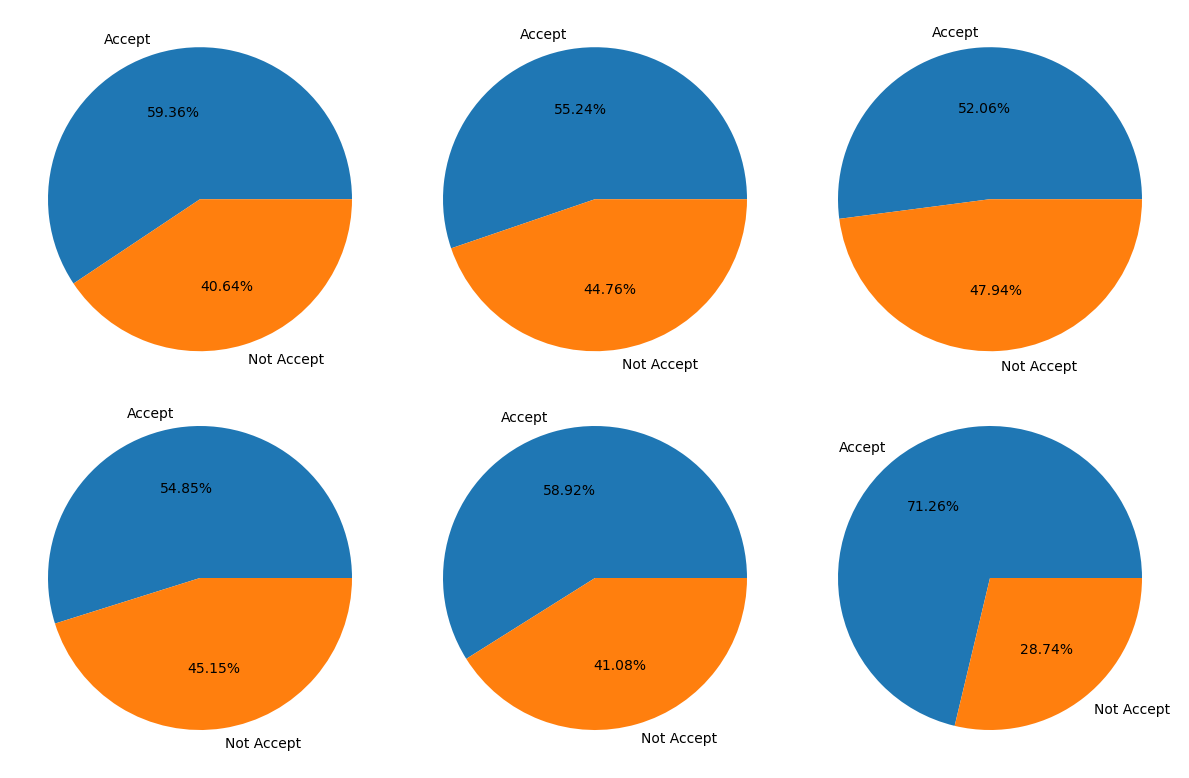

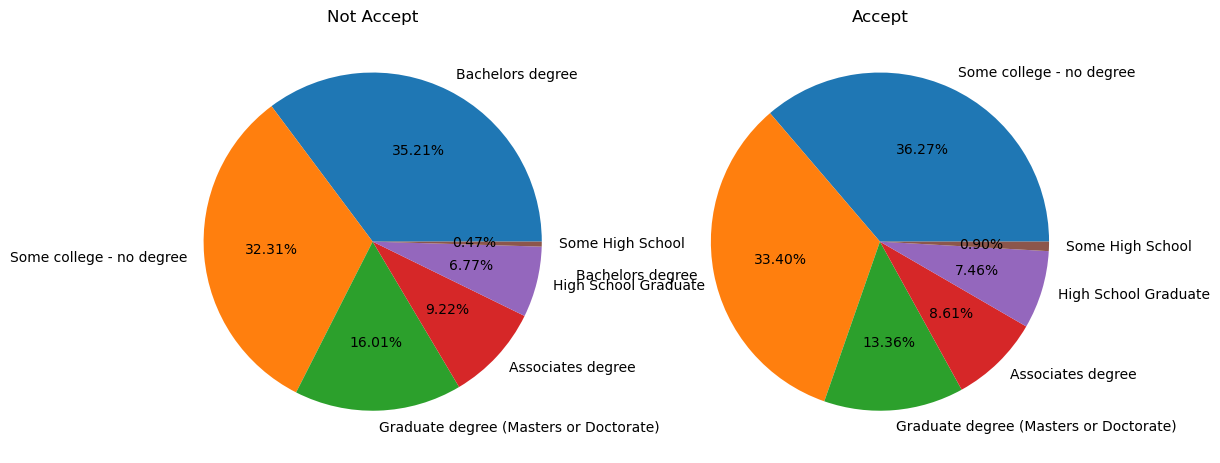

In [38]:
analysis6('education')

In [39]:
def analysis8(var):
    f, ax = plt.subplots(2,1, figsize=(16,20), dpi=100)
    plt.subplot(2,1,1)
    ax1 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index)
    for a in ax1.containers:
        ax1.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.subplot(2,1,2)
    ax2 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index, hue='Accept')
    for a in ax2.containers:
        ax2.bar_label(a, fmt='%d', label_type='edge', color='black')


    plt.suptitle(var, size=16)

    f, ax = plt.subplots(2,4, figsize= (12,8), dpi= 100)
    value = list(data[var].value_counts().index)
    ind = 0
    for i in range(2):
        for j in range(4):
            df1 = data[data[var] == value[ind]]
            ax[i,j].pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
#             plt.title(value[ind])
            ind = ind + 1
        plt.tight_layout()
    plt.show()


    f, ax = plt.subplots(1,2, figsize=(12,8), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data['Accept'] == 0]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Not Accept')

    plt.subplot(1,2,2)
    df1 = data[data['Accept'] == 1]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Accept')



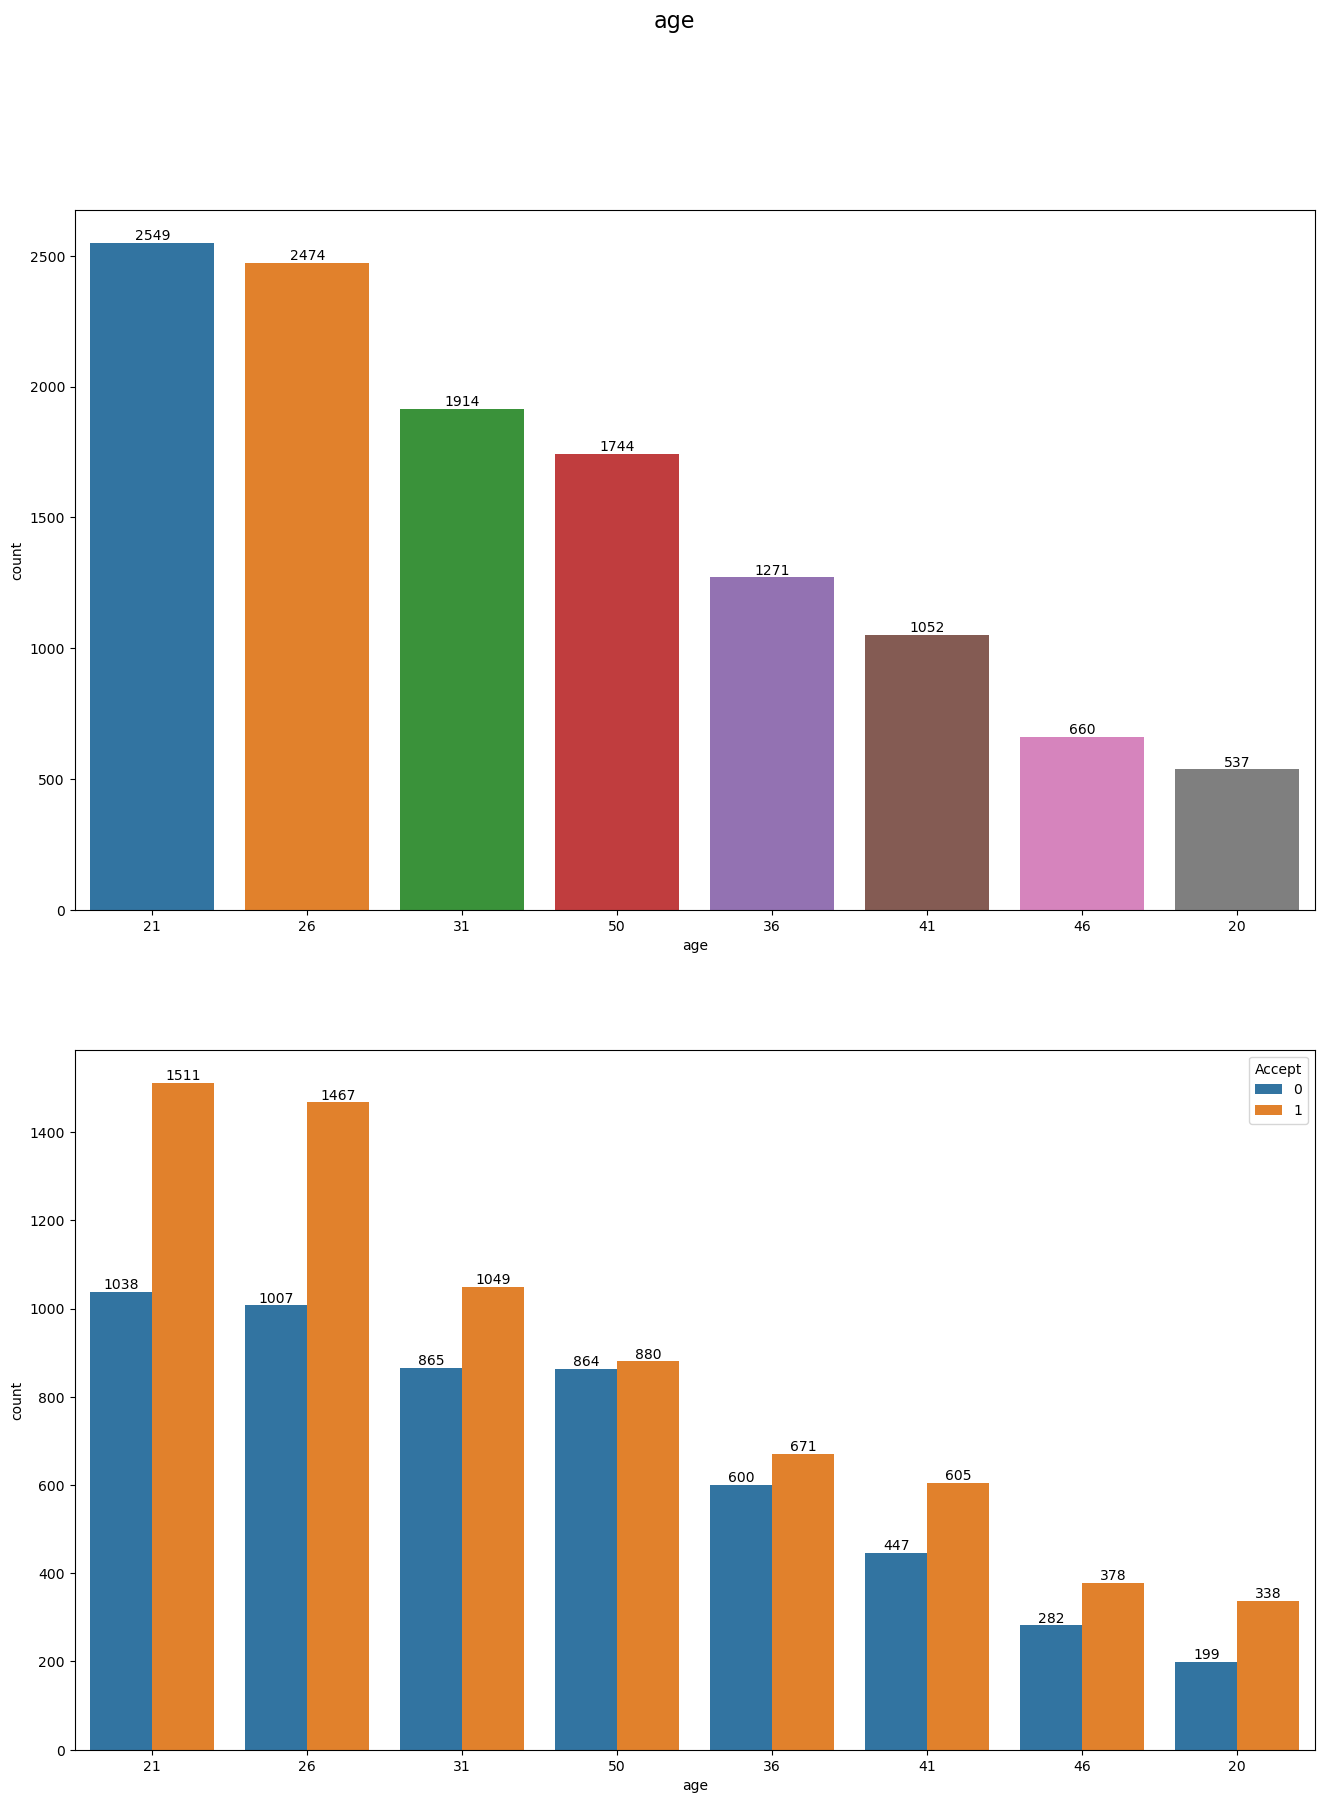

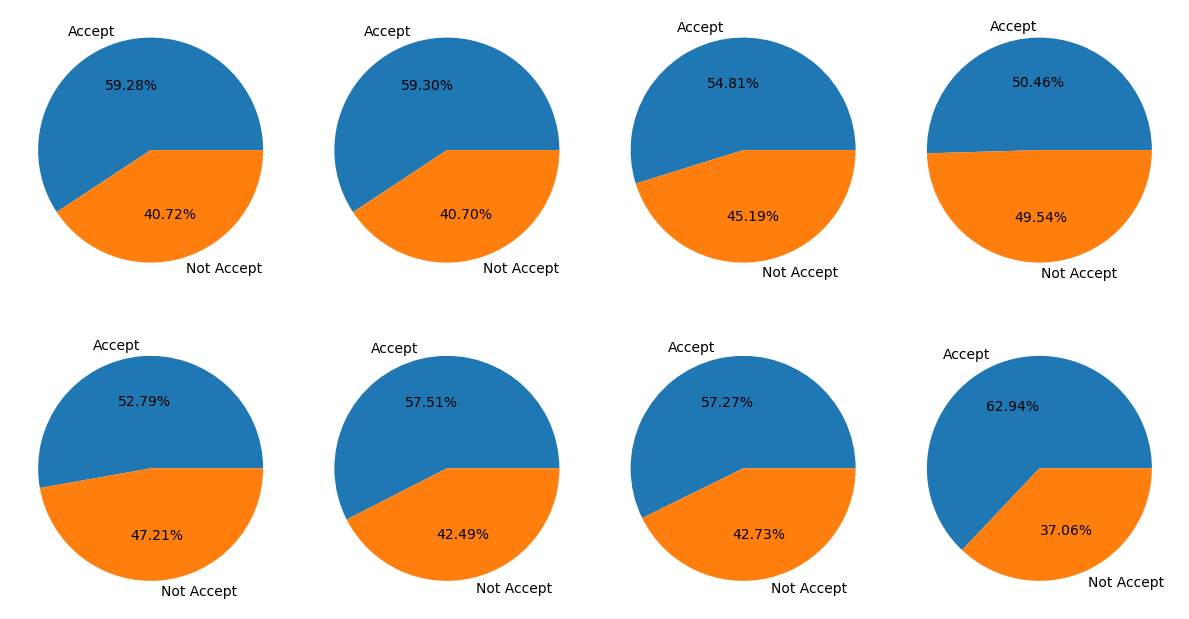

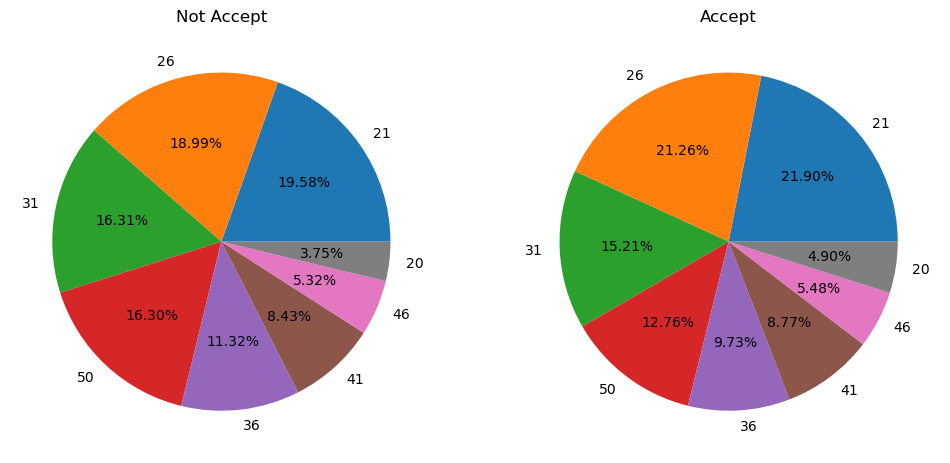

In [40]:
analysis8('age')

In [41]:
def analysis9(var):
    f, ax = plt.subplots(2,1, figsize=(16,20), dpi=100)
    plt.subplot(2,1,1)
    ax1 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index)
    for a in ax1.containers:
        ax1.bar_label(a, fmt='%d', label_type='edge', color='black')

    plt.subplot(2,1,2)
    ax2 = sns.countplot(x= var, data = data, order= data[var].value_counts(ascending=False).index, hue='Accept')
    for a in ax2.containers:
        ax2.bar_label(a, fmt='%d', label_type='edge', color='black')


    plt.suptitle(var, size=16)

    f, ax = plt.subplots(3,3, figsize= (12,8), dpi= 100)
    value = list(data[var].value_counts().index)
    ind = 0
    for i in range(3):
        for j in range(3):
            df1 = data[data[var] == value[ind]]
            ax[i,j].pie(df1['Accept'].value_counts(), labels= df1['Accept'].value_counts().index.map({1 :'Accept', 0:'Not Accept' }), autopct= '%.2f%%')
#             plt.title(value[ind])
            ind = ind + 1
        plt.tight_layout()
    plt.show()


    f, ax = plt.subplots(1,2, figsize=(12,8), dpi=100)
    plt.subplot(1,2,1)
    df1 = data[data['Accept'] == 0]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Not Accept')

    plt.subplot(1,2,2)
    df1 = data[data['Accept'] == 1]
    plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
    plt.title('Accept')



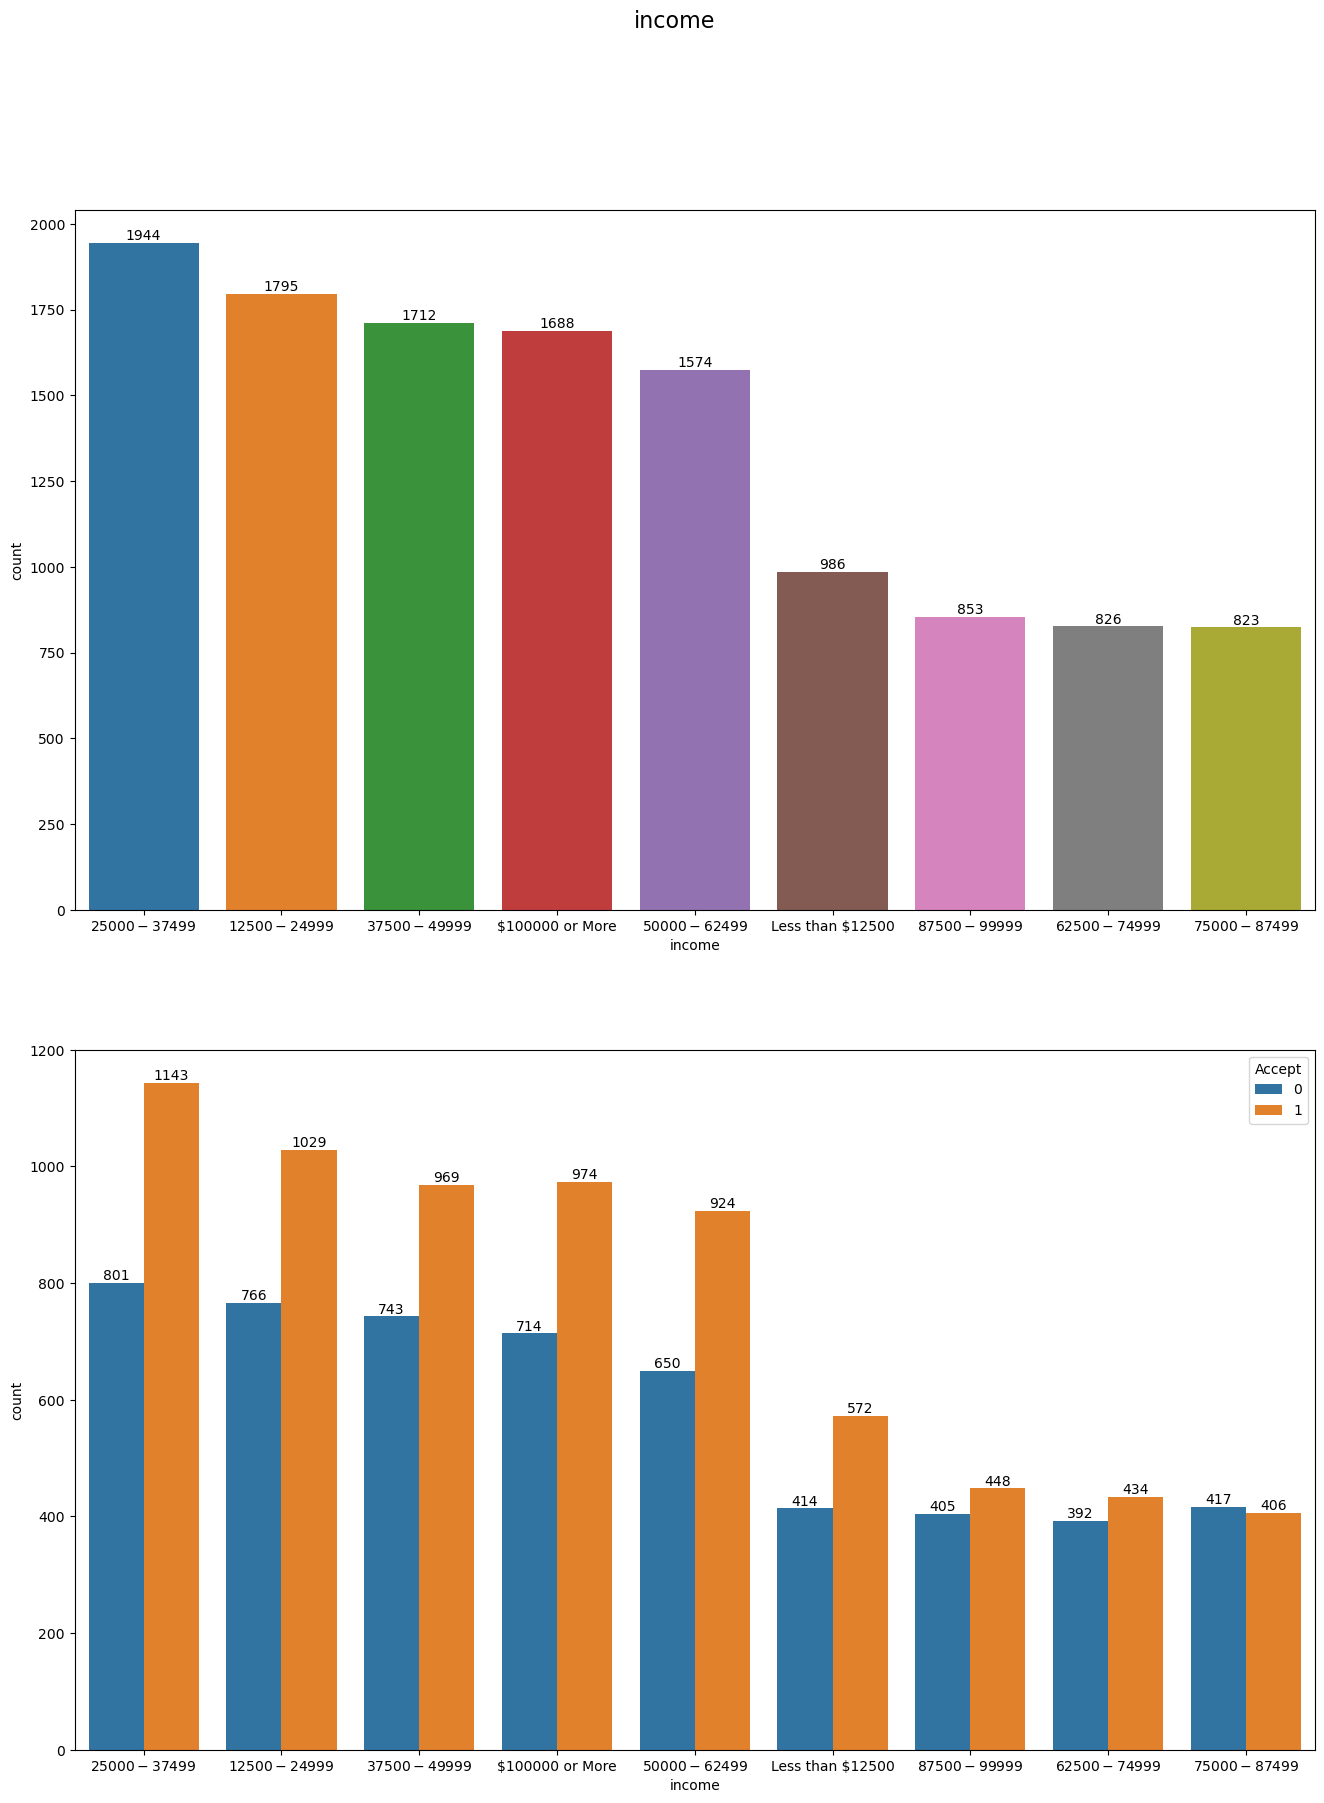

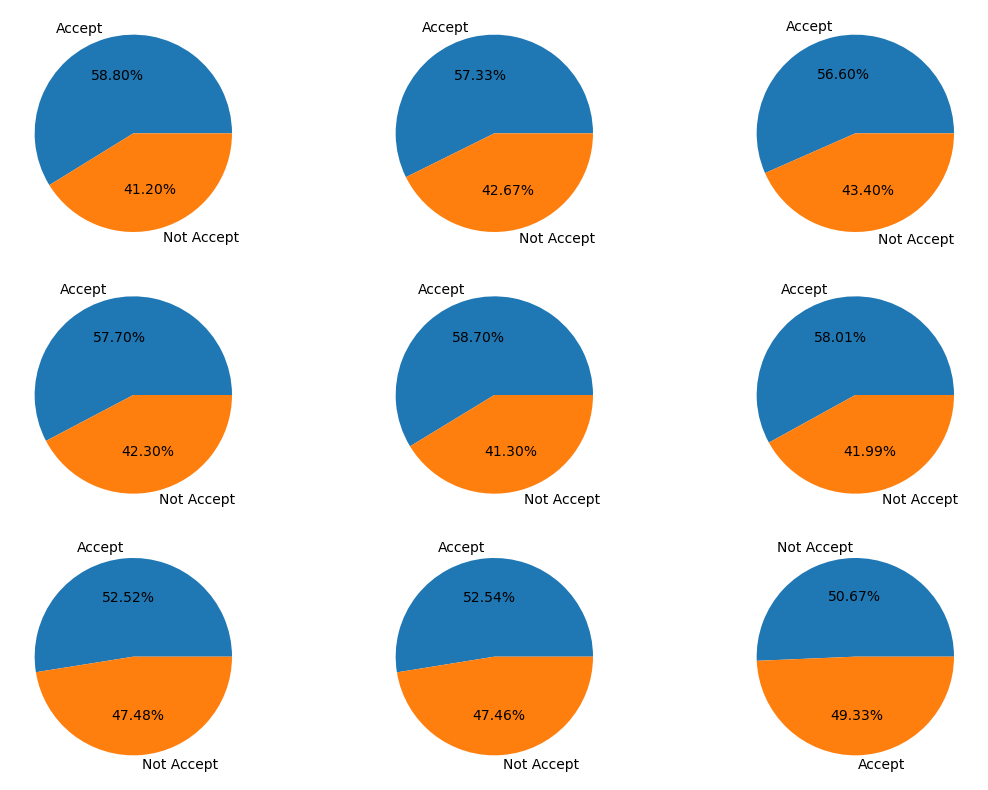

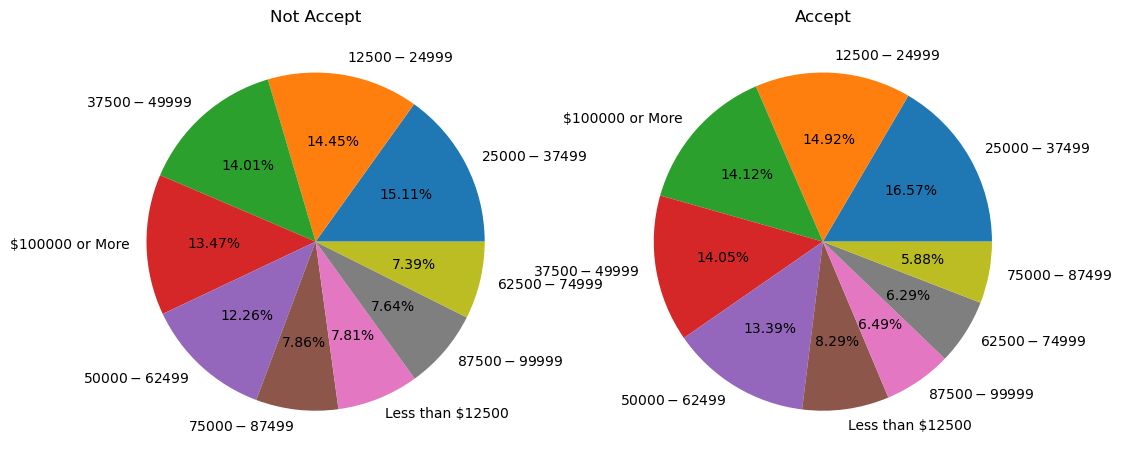

In [42]:
analysis9('income')

In [43]:
def analysis25(var):
  f, ax = plt.subplots(2,1, figsize=(20,30), dpi=100)
  plt.subplot(2,1,1)
  df1 = data[data['Accept'] == 0]
  plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
  plt.title('Not Accept')

  plt.subplot(2,1,2)
  df1 = data[data['Accept'] == 1]
  plt.pie(df1[var].value_counts(), labels= df1[var].value_counts().index, autopct= '%.2f%%')
  plt.title('Accept')
  plt.show()

  # print(pd.crosstab( data[var], data['Accept']))

  sns.heatmap(pd.crosstab( data[var], data['Accept']))

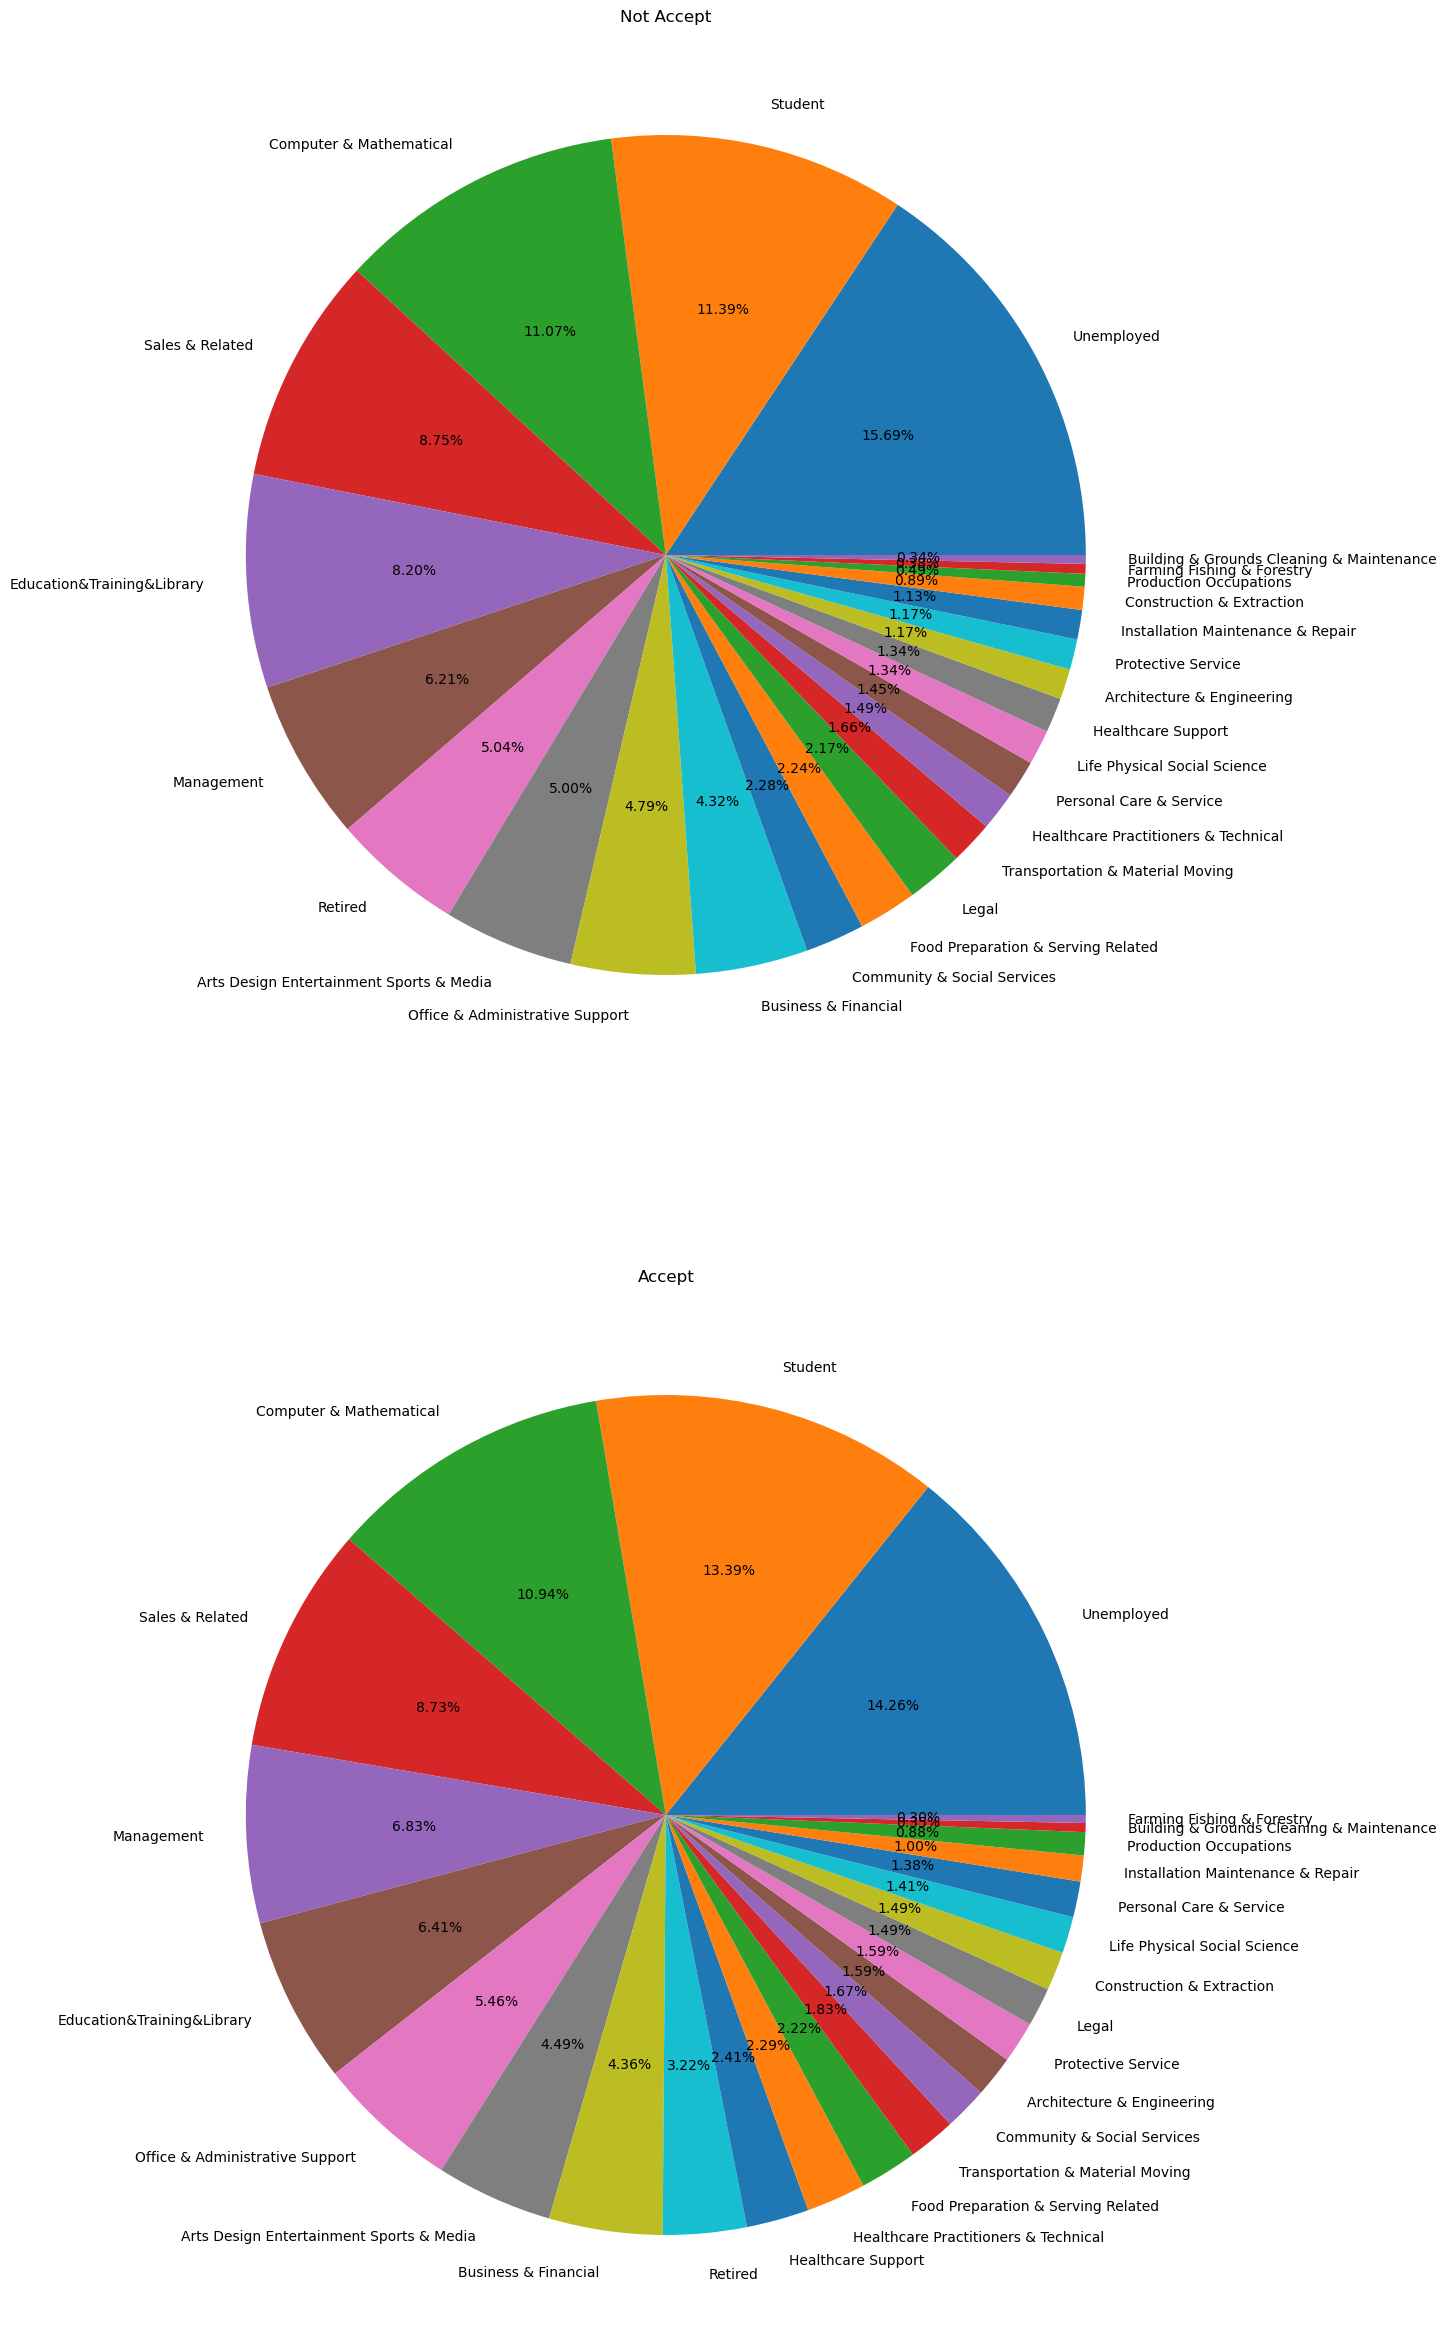

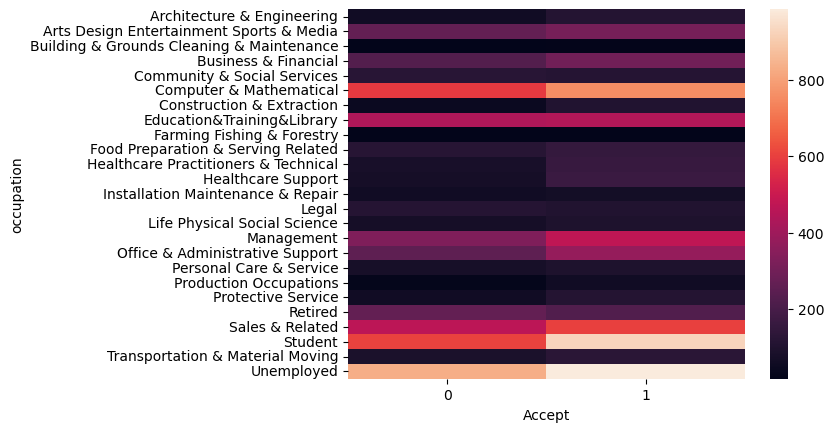

In [44]:
analysis25('occupation')

In [45]:
pd.crosstab( data['occupation'], data['Accept'])

Accept                                       0    1
occupation                                         
Architecture & Engineering                  62  110
Arts Design Entertainment Sports & Media   265  310
Building & Grounds Cleaning & Maintenance   18   24
Business & Financial                       229  301
Community & Social Services                121  115
Computer & Mathematical                    587  755
Construction & Extraction                   47  103
Education&Training&Library                 435  442
Farming Fishing & Forestry                  20   21
Food Preparation & Serving Related         119  153
Healthcare Practitioners & Technical        79  158
Healthcare Support                          71  166
Installation Maintenance & Repair           60   69
Legal                                      115  103
Life Physical Social Science                71   97
Management                                 329  471
Office & Administrative Support            254  377
Personal Care & Service                     77   95
Production Occupations                      26   61
Protective Service                          62  110
Retired                                    267  222
Sales & Related                            464  602
Student                                    604  924
Transportation & Material Moving            88  126
Unemployed                                 832  984

### **Further DATA Preprocessing**

In [46]:
data.loc[data['expiration'] == '1d', 'expiration'] = 24
data.loc[data['expiration'] == '2h', 'expiration'] = 2

def imp(a):
    data.loc[data[a] == 'less1', a] = 'never'

col = ['Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' ]
for i in col:
    imp(i)


In [47]:
# data.loc[data['expiration'] == 24, 'expiration'] = 1
# data.loc[data['expiration'] == '2h', 'expiration'] = 2

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

trans = ColumnTransformer(transformers = [
    ('tf1', OneHotEncoder(sparse_output=False, drop='first'), ['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus', 'occupation']),
    ('tf2', OrdinalEncoder(categories = [['Some High School','High School Graduate', 'Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)']]), ['education']),
    ('tf3', OrdinalEncoder(categories = [['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']]), ['income']),
    ('tf4', OrdinalEncoder(categories = [['never', '1~3', '4~8', 'gt8']]), ['Bar']),
    ('tf5', OrdinalEncoder(categories = [['never', '1~3', '4~8', 'gt8']]), ['CoffeeHouse']),
    ('tf6', OrdinalEncoder(categories = [['never', '1~3', '4~8', 'gt8']]), ['CarryAway']),
    ('tf7', OrdinalEncoder(categories = [['never', '1~3', '4~8', 'gt8']]), ['RestaurantLessThan20']),
    ('tf8', OrdinalEncoder(categories = [['never', '1~3', '4~8', 'gt8']]), ['Restaurant20To50']),
    ], remainder='passthrough')

In [49]:
new_data = trans.fit_transform(data)

In [50]:
new_data

array([[1.0, 0.0, 0.0, ..., 0, 0, 1],
       [1.0, 0.0, 1.0, ..., 0, 0, 0],
       [1.0, 0.0, 1.0, ..., 0, 0, 1],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 1, 0],
       [0.0, 1.0, 0.0, ..., 1, 0, 0],
       [0.0, 1.0, 0.0, ..., 0, 1, 0]], dtype=object)

### **Multicollinearity Check**

In [51]:
df = pd.DataFrame(new_data)

In [52]:
df

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1      1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2      1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4      1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12196  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   
12197  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   
12198  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
12199  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
12200  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  3.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  3.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  3.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  3.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  3.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  4.0  6.0   
12197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  4.0  6.0   
12198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  4.0  6.0   
12199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  4.0  6.0   
12200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  4.0  6.0   

        42   43   44   45   46  47  48  49 50 51 52 53 54  
0      0.0  0.0  1.0  2.0  1.0  55  24  21  1  0  0  0  1  
1      0.0  0.0  1.0  2.0  1.0  80   2  21  1  0  0  0  0  
2      0.0  0.0  1.0  2.0  1.0  80   2  21  1  1  0  0  1  
3      0.0  0.0  1.0  2.0  1.0  80   2  21  1  1  0  0  0  
4      0.0  0.0  1.0  2.0  1.0  80  24  21  1  1  0  0  0  
...    ...  ...  ...  ...  ...  ..  ..  .. .. .. .. .. ..  
12196  0.0  0.0  1.0  2.0  1.0  55  24  26  0  0  0  1  1  
12197  0.0  0.0  1.0  2.0  1.0  55  24  26  0  0  0  0  1  
12198  0.0  0.0  1.0  2.0  1.0  30  24  26  0  0  0  1  0  
12199  0.0  0.0  1.0  2.0  1.0  30  24  26  0  1  1  0  0  
12200  0.0  0.0  1.0  2.0  1.0  80   2  26  0  0  0  1  0  

[12201 rows x 55 columns]

<Axes: >

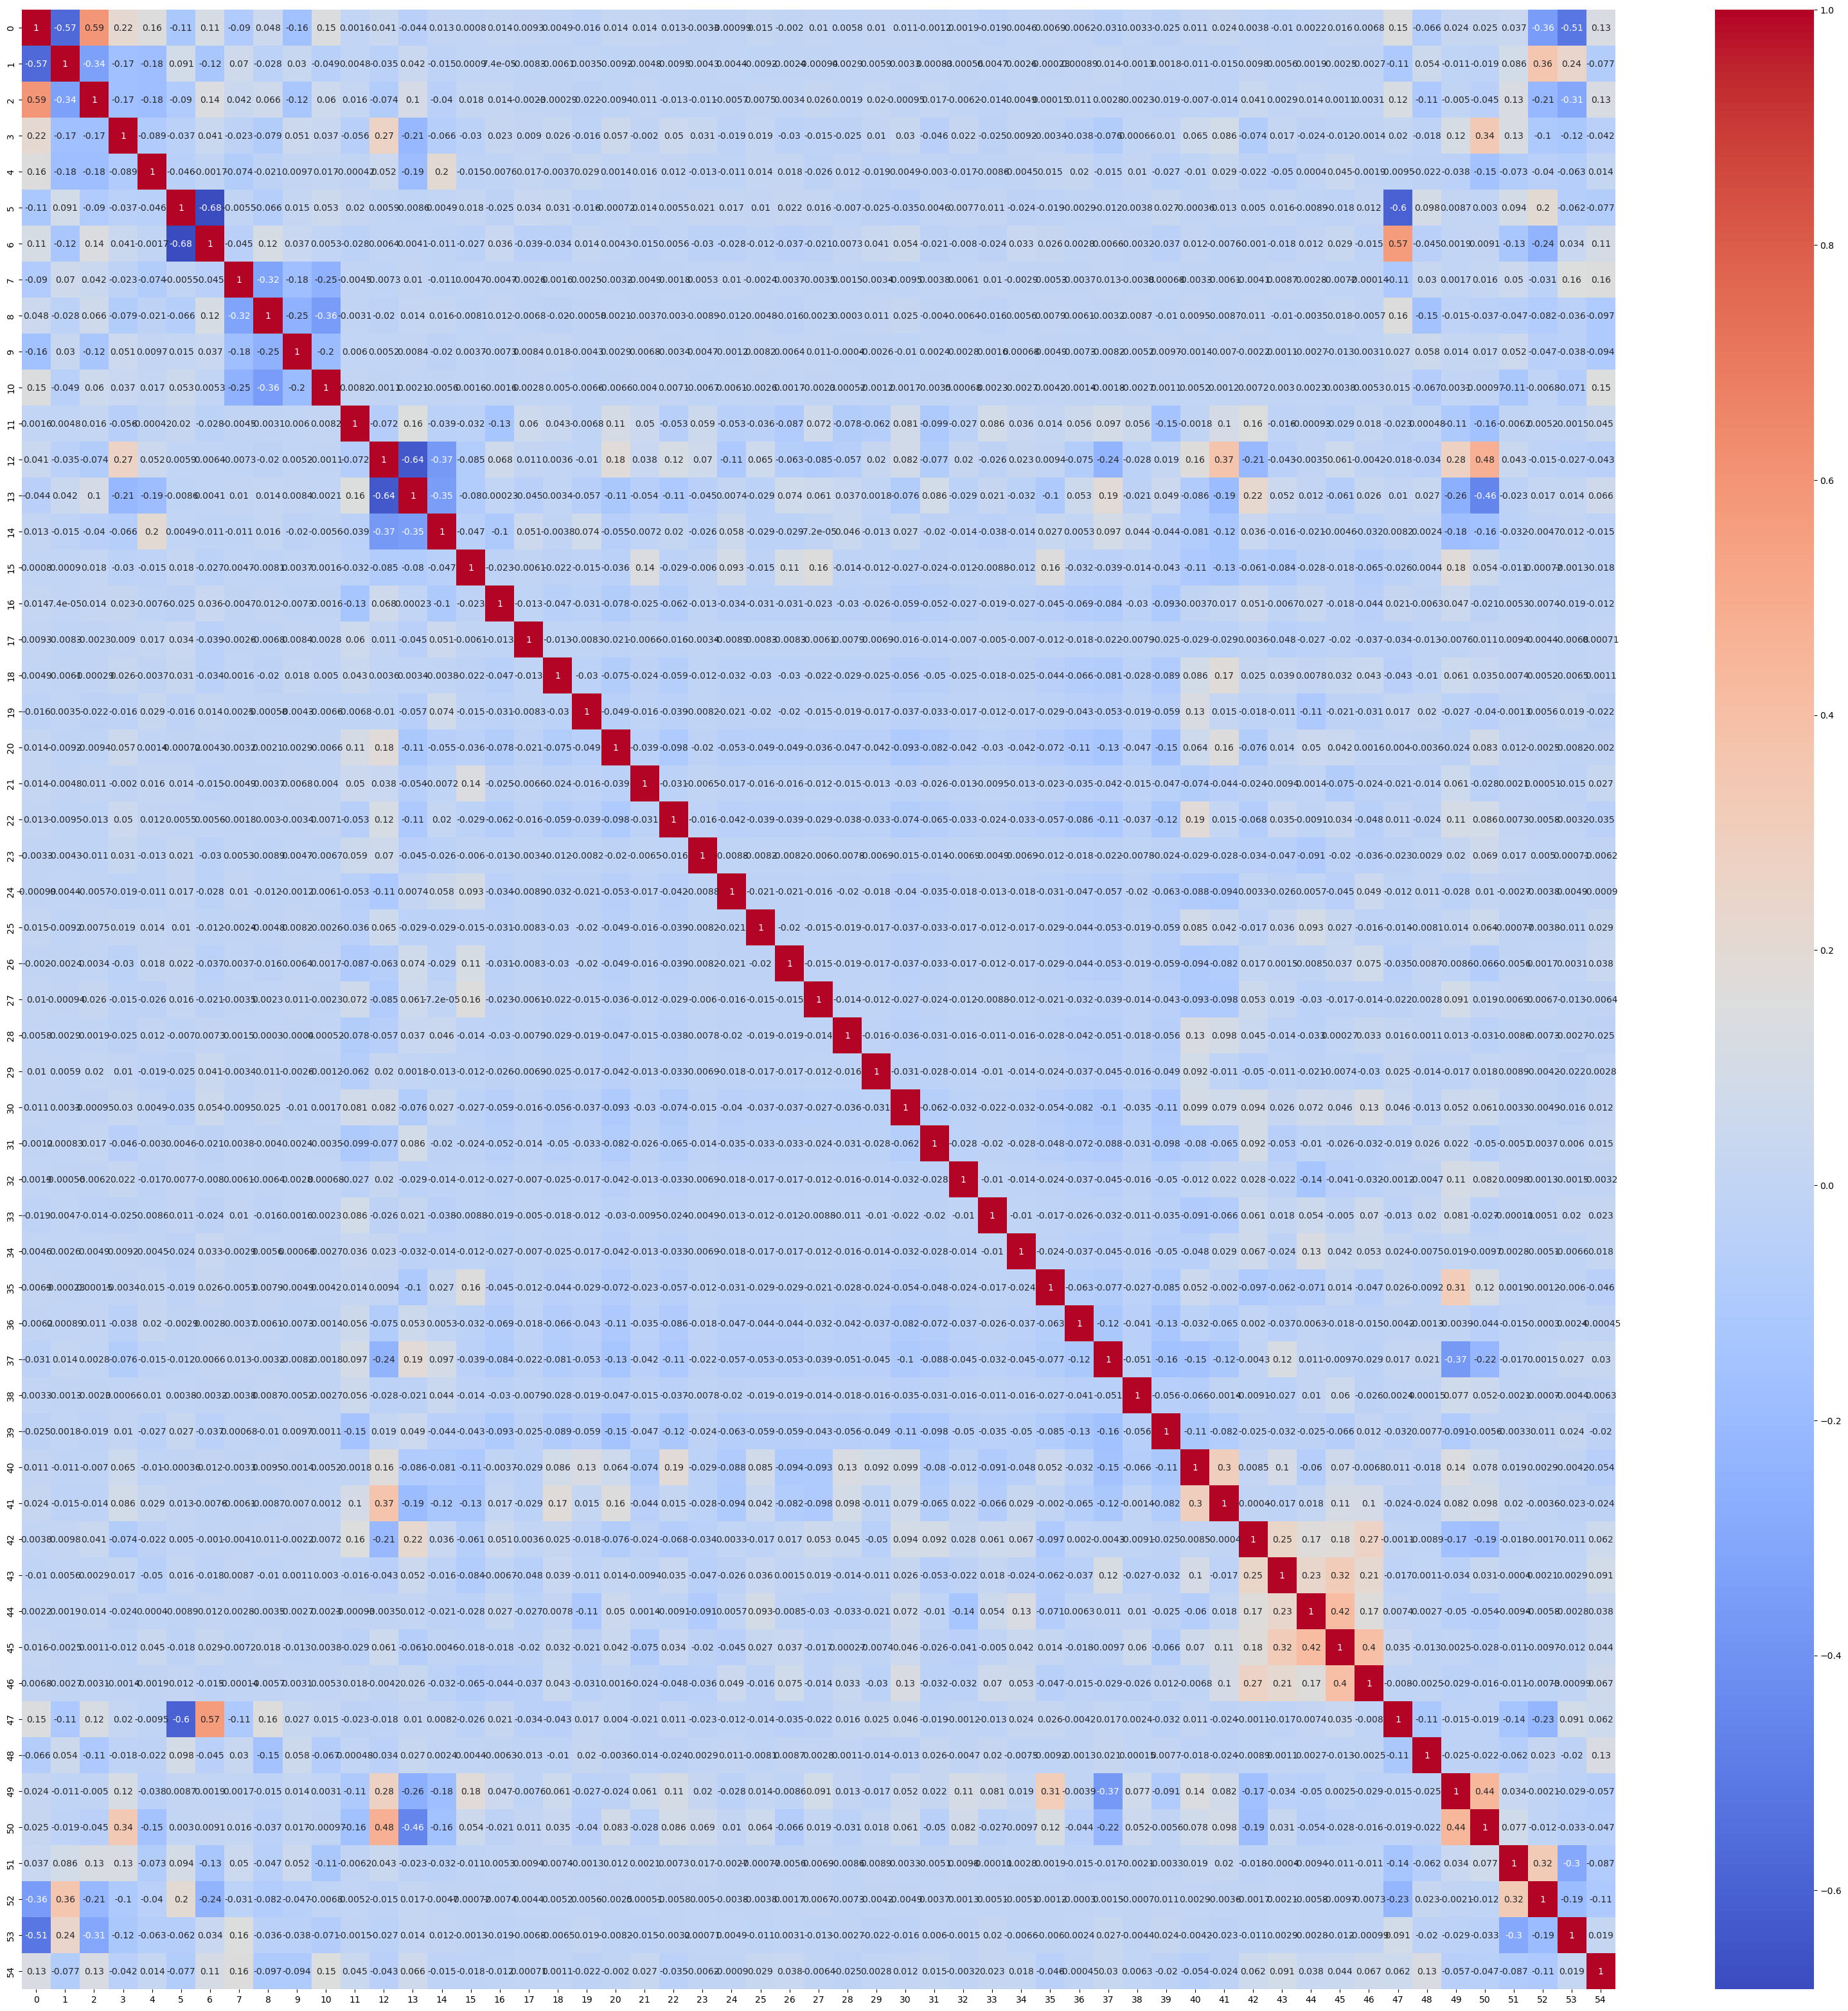

In [53]:
plt.figure(figsize = (40,40), dpi = 100)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## **Feature Selection**

In [54]:
x = df.drop([54], axis=1)
y = df[54]
y = y.astype('int')

In [55]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
feature_kbest = SelectKBest(score_func=mutual_info_classif)
feature_kbest.fit_transform(x,y)

Feature_score = pd.DataFrame()
Feature_score["Mutual_Score"] = feature_kbest.scores_
Feature_Sorted = Feature_score.sort_values(by='Mutual_Score',ascending=False,ignore_index=True)
feature_sorted_withoutorder = Feature_score.sort_values(by='Mutual_Score',ascending=False)
Feature_Sorted

Mutual_Score
0       0.015128
1       0.014262
2       0.011945
3       0.011687
4       0.010785
5       0.009133
6       0.008841
7       0.008263
8       0.008083
9       0.007924
10      0.007915
11      0.007355
12      0.007117
13      0.006485
14      0.006050
15      0.005996
16      0.005967
17      0.005578
18      0.005456
19      0.005001
20      0.004879
21      0.004835
22      0.004795
23      0.004142
24      0.003817
25      0.002959
26      0.002840
27      0.002813
28      0.002708
29      0.002445
30      0.002348
31      0.002172
32      0.002014
33      0.001452
34      0.001355
35      0.001093
36      0.000953
37      0.000710
38      0.000217
39      0.000102
40      0.000065
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000

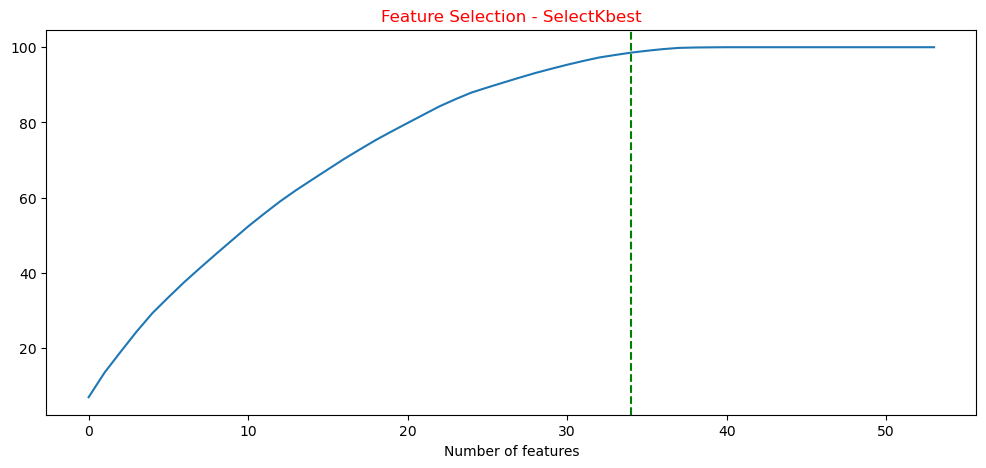

In [56]:
Percentage = [(i/sum(Feature_Sorted['Mutual_Score']))*100 for i in Feature_Sorted['Mutual_Score']]
Cum_List = []
a= 0
for i in Percentage:
    Cum_List.append(a+i)
    a=a+i

plt.figure(figsize=(12,5))
graph = sns.lineplot(Cum_List)
graph.axvline(34,ls="--",color='g')
plt.title("Feature Selection - SelectKbest",color='r')
plt.xlabel('Number of features')
plt.show()

In [57]:
unwanted = list(feature_sorted_withoutorder.index)[34:]

In [58]:
final_data = df.copy()
final_data.drop(unwanted, axis=1, inplace=True)

In [59]:
final_data

0    2    4    5    6    7    8    9    10   11   12   13   15   19  \
0      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1      1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12196  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
12197  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
12198  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
12199  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
12200  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   

        21   25   27   29   30   31   32   38   40   43   44   45   46  47  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  2.0  1.0  55   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  2.0  1.0  80   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  2.0  1.0  80   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  2.0  1.0  80   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  2.0  1.0  80   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..   
12196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  1.0  2.0  1.0  55   
12197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  1.0  2.0  1.0  55   
12198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  1.0  2.0  1.0  30   
12199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  1.0  2.0  1.0  30   
12200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  1.0  2.0  1.0  80   

       48  49 50 51 52 53 54  
0      24  21  1  0  0  0  1  
1       2  21  1  0  0  0  0  
2       2  21  1  1  0  0  1  
3       2  21  1  1  0  0  0  
4      24  21  1  1  0  0  0  
...    ..  .. .. .. .. .. ..  
12196  24  26  0  0  0  1  1  
12197  24  26  0  0  0  0  1  
12198  24  26  0  0  0  1  0  
12199  24  26  0  1  1  0  0  
12200   2  26  0  0  0  1  0  

[12201 rows x 35 columns]

## **Train Test Split and Feature Scaling**

In [60]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

X = final_data.drop([54], axis=1)
y = final_data[54]

scale = MaxAbsScaler()
x_scaled = scale.fit_transform(X)


In [61]:
x_scaled.shape

(12201, 34)

In [62]:
y = y.astype('int')

In [63]:
x_model, x_test, y_model, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.2, random_state=42)

## **MODEL TRAINING AND SELECTION**

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [92]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
NB = GaussianNB()
GB = GradientBoostingClassifier()
ADA = AdaBoostClassifier()
LGBM = LGBMClassifier()
XGB = XGBClassifier()
CAT = CatBoostClassifier()


models = [LR, DT, RF, SVM, NB, GB, ADA, LGBM, XGB, CAT]

In [93]:
def modelling(mod):
  for i in mod:
    i.fit(x_train,y_train)
    y_pred_train = i.predict(x_train)
    y_pred_val = i.predict(x_val)
    print('=' * 50)
    print('Performance of ' + str(i) + ':' )
    print('-' * 30)
    print('Training Accurancy Score : ', accuracy_score(y_train, y_pred_train)*100)
    print('Validation Accurancy Score : ', accuracy_score(y_val, y_pred_val)*100)
    # print('Classification Report : ', classification_report(y_pred, y_val))

    print('\n')

In [94]:
modelling(models)

Performance of LogisticRegression():
------------------------------
Training Accurancy Score :  68.38570127504553
Validation Accurancy Score :  67.71402550091075


Performance of DecisionTreeClassifier():
------------------------------
Training Accurancy Score :  98.78187613843352
Validation Accurancy Score :  63.79781420765027


Performance of RandomForestClassifier():
------------------------------
Training Accurancy Score :  98.78187613843352
Validation Accurancy Score :  70.71948998178506


Performance of SVC():
------------------------------
Training Accurancy Score :  73.59972677595628
Validation Accurancy Score :  69.48998178506375


Performance of GaussianNB():
------------------------------
Training Accurancy Score :  64.69717668488161
Validation Accurancy Score :  63.479052823315115


Performance of GradientBoostingClassifier():
------------------------------
Training Accurancy Score :  71.73269581056466
Validation Accurancy Score :  69.76320582877959


Performance of AdaBoos

102:	learn: 0.5717154	total: 342ms	remaining: 2.98s
103:	learn: 0.5714866	total: 344ms	remaining: 2.96s
104:	learn: 0.5709534	total: 346ms	remaining: 2.95s
105:	learn: 0.5705762	total: 348ms	remaining: 2.93s
106:	learn: 0.5702062	total: 350ms	remaining: 2.92s
107:	learn: 0.5698850	total: 351ms	remaining: 2.9s
108:	learn: 0.5694948	total: 353ms	remaining: 2.89s
109:	learn: 0.5691338	total: 355ms	remaining: 2.88s
110:	learn: 0.5689088	total: 357ms	remaining: 2.86s
111:	learn: 0.5683907	total: 359ms	remaining: 2.85s
112:	learn: 0.5679676	total: 362ms	remaining: 2.84s
113:	learn: 0.5676681	total: 363ms	remaining: 2.82s
114:	learn: 0.5673825	total: 365ms	remaining: 2.81s
115:	learn: 0.5670528	total: 367ms	remaining: 2.8s
116:	learn: 0.5667287	total: 369ms	remaining: 2.79s
117:	learn: 0.5663186	total: 371ms	remaining: 2.77s
118:	learn: 0.5659843	total: 373ms	remaining: 2.76s
119:	learn: 0.5657802	total: 375ms	remaining: 2.75s
120:	learn: 0.5652774	total: 376ms	remaining: 2.73s
121:	learn: 0.

303:	learn: 0.5227473	total: 736ms	remaining: 1.68s
304:	learn: 0.5225482	total: 738ms	remaining: 1.68s
305:	learn: 0.5224349	total: 740ms	remaining: 1.68s
306:	learn: 0.5223170	total: 742ms	remaining: 1.68s
307:	learn: 0.5221424	total: 744ms	remaining: 1.67s
308:	learn: 0.5219451	total: 746ms	remaining: 1.67s
309:	learn: 0.5217731	total: 748ms	remaining: 1.67s
310:	learn: 0.5214148	total: 750ms	remaining: 1.66s
311:	learn: 0.5211932	total: 752ms	remaining: 1.66s
312:	learn: 0.5210552	total: 754ms	remaining: 1.66s
313:	learn: 0.5209473	total: 756ms	remaining: 1.65s
314:	learn: 0.5207896	total: 759ms	remaining: 1.65s
315:	learn: 0.5204764	total: 761ms	remaining: 1.65s
316:	learn: 0.5203127	total: 763ms	remaining: 1.64s
317:	learn: 0.5200717	total: 765ms	remaining: 1.64s
318:	learn: 0.5199159	total: 766ms	remaining: 1.64s
319:	learn: 0.5196911	total: 768ms	remaining: 1.63s
320:	learn: 0.5194465	total: 770ms	remaining: 1.63s
321:	learn: 0.5192795	total: 772ms	remaining: 1.63s
322:	learn: 

502:	learn: 0.4882808	total: 1.13s	remaining: 1.12s
503:	learn: 0.4881109	total: 1.13s	remaining: 1.11s
504:	learn: 0.4879581	total: 1.14s	remaining: 1.11s
505:	learn: 0.4878340	total: 1.14s	remaining: 1.11s
506:	learn: 0.4876448	total: 1.14s	remaining: 1.11s
507:	learn: 0.4874982	total: 1.14s	remaining: 1.1s
508:	learn: 0.4873080	total: 1.14s	remaining: 1.1s
509:	learn: 0.4871689	total: 1.15s	remaining: 1.1s
510:	learn: 0.4870141	total: 1.15s	remaining: 1.1s
511:	learn: 0.4868419	total: 1.15s	remaining: 1.09s
512:	learn: 0.4866880	total: 1.15s	remaining: 1.09s
513:	learn: 0.4865287	total: 1.15s	remaining: 1.09s
514:	learn: 0.4863716	total: 1.16s	remaining: 1.09s
515:	learn: 0.4862014	total: 1.16s	remaining: 1.08s
516:	learn: 0.4860745	total: 1.16s	remaining: 1.08s
517:	learn: 0.4858347	total: 1.16s	remaining: 1.08s
518:	learn: 0.4856629	total: 1.16s	remaining: 1.08s
519:	learn: 0.4854607	total: 1.17s	remaining: 1.07s
520:	learn: 0.4853194	total: 1.17s	remaining: 1.07s
521:	learn: 0.48

713:	learn: 0.4582237	total: 1.55s	remaining: 622ms
714:	learn: 0.4580845	total: 1.55s	remaining: 620ms
715:	learn: 0.4579968	total: 1.56s	remaining: 618ms
716:	learn: 0.4578564	total: 1.56s	remaining: 616ms
717:	learn: 0.4577793	total: 1.56s	remaining: 613ms
718:	learn: 0.4576576	total: 1.56s	remaining: 611ms
719:	learn: 0.4574460	total: 1.56s	remaining: 609ms
720:	learn: 0.4573077	total: 1.57s	remaining: 607ms
721:	learn: 0.4572295	total: 1.57s	remaining: 604ms
722:	learn: 0.4571301	total: 1.57s	remaining: 602ms
723:	learn: 0.4570328	total: 1.57s	remaining: 600ms
724:	learn: 0.4568763	total: 1.57s	remaining: 598ms
725:	learn: 0.4567571	total: 1.58s	remaining: 595ms
726:	learn: 0.4565777	total: 1.58s	remaining: 593ms
727:	learn: 0.4565032	total: 1.58s	remaining: 591ms
728:	learn: 0.4563971	total: 1.58s	remaining: 589ms
729:	learn: 0.4562986	total: 1.58s	remaining: 586ms
730:	learn: 0.4561270	total: 1.59s	remaining: 584ms
731:	learn: 0.4559930	total: 1.59s	remaining: 582ms
732:	learn: 

922:	learn: 0.4338661	total: 1.96s	remaining: 164ms
923:	learn: 0.4337802	total: 1.97s	remaining: 162ms
924:	learn: 0.4337047	total: 1.97s	remaining: 160ms
925:	learn: 0.4336214	total: 1.97s	remaining: 157ms
926:	learn: 0.4335431	total: 1.97s	remaining: 155ms
927:	learn: 0.4333934	total: 1.97s	remaining: 153ms
928:	learn: 0.4332774	total: 1.98s	remaining: 151ms
929:	learn: 0.4331724	total: 1.98s	remaining: 149ms
930:	learn: 0.4330752	total: 1.98s	remaining: 147ms
931:	learn: 0.4329529	total: 1.98s	remaining: 145ms
932:	learn: 0.4328608	total: 1.98s	remaining: 142ms
933:	learn: 0.4327455	total: 1.99s	remaining: 140ms
934:	learn: 0.4326388	total: 1.99s	remaining: 138ms
935:	learn: 0.4325219	total: 1.99s	remaining: 136ms
936:	learn: 0.4323863	total: 1.99s	remaining: 134ms
937:	learn: 0.4322560	total: 1.99s	remaining: 132ms
938:	learn: 0.4321886	total: 2s	remaining: 130ms
939:	learn: 0.4320578	total: 2s	remaining: 127ms
940:	learn: 0.4319468	total: 2s	remaining: 125ms
941:	learn: 0.4318120

## **Selecting Top Models for further Analysis**

From the Accuracy calculated, we can select **Lgbm** , **Random Forest** and **Decision Tree** Classifiers for further analysis. We can perform hyper parameter tuning to solve the Overfitting problem in these models.

## **HYPERPARAMETER TUNING**

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
dt_param = {
    'criterion': ['gini', 'entropy'],  # Criterion to measure the quality of a split
    'max_depth': [None, 5, 10, 15, 20, 25, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']  # Weighs the classes equally or inversely proportional to their frequency
}

In [73]:
rf_param = {
    'n_estimators': [20,40,60,80,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,2, 4, 5, 6,8, 10],
    'min_samples_split': [2,4,5,8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [0.2, 0.4, 0.6], # Fixed typo here: max_features instead of max_feature
    'bootstrap': [True, False]
}

In [74]:
lgbm_param = {"max_depth": np.arange(1,11),
               "n_estimators": [int(i) for i in np.linspace(100,1000,10)],
              "num_leaves" : np.arange(1,16,2),
              "min_child_samples" : np.arange(1,11,2),
              "min_child_weight": np.arange(0.001,0.011,0.001),
              "boosting_type" : ['gbdt','dart', 'goss','rf']}

In [75]:
parameters = [('Decision Tree', DecisionTreeClassifier(), dt_param),
               ('Random Forest', RandomForestClassifier(), rf_param)]
              # ('LGBM', LGBMClassifier(), lgbm_param)]

In [76]:
def tuning(model, algo, params):
  grid = GridSearchCV(estimator = algo, param_grid = params, cv=5, scoring='accuracy')
  grid.fit(x_train, y_train)
  print('=' * 30)
  print(f'Best Parameters of {model} :')
  print('Best Parameters : ', grid.best_params_)
  print('Best Score : ', grid.best_score_)

  print('\n')

In [77]:
for model, algo, params in parameters:
  tuning(model, algo, params)

Best Parameters of Decision Tree :
Best Parameters :  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score :  0.6625674976631061




KeyboardInterrupt: 

In [78]:
RF = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 100)
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf =  4, min_samples_split = 10, max_features = 'log2', class_weight = None)

new_model =  [ RF, DT]

modelling(new_model)

Performance of RandomForestClassifier(min_samples_leaf=2, min_samples_split=10):
------------------------------
Training Accurancy Score :  84.03916211293262
Validation Accurancy Score :  70.67395264116576


Performance of DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10):
------------------------------
Training Accurancy Score :  74.35109289617486
Validation Accurancy Score :  64.38979963570127




## **Model Evaluation**


we are select Random Forest lgorithmn as the best Algorithm.

we are going to evaluate the algoritmn.


In [79]:
# RF fit

RF.fit(x_train,y_train)


Y_Pred_train = RF.predict(x_train)
Accuracy_Train = accuracy_score(y_train,Y_Pred_train)
print(f" Training accuracy of Random Forest Algorithmn is {Accuracy_Train*100:.2f}%")

Y_Pred_test = RF.predict(x_test)
Accuracy_Test = accuracy_score(y_test,Y_Pred_test)
print(f" Testing accuracy of Random Forest Algorithmn is {Accuracy_Test*100:.2f}%")

Report = classification_report(y_test,Y_Pred_test)
print(Report)

 Training accuracy of Random Forest Algorithmn is 84.16%
 Testing accuracy of Random Forest Algorithmn is 71.17%
              precision    recall  f1-score   support

           0       0.70      0.61      0.66       546
           1       0.72      0.79      0.75       675

    accuracy                           0.71      1221
   macro avg       0.71      0.70      0.70      1221
weighted avg       0.71      0.71      0.71      1221



## **Conclusion**



The results show that the **Random Forest** Model performs well for our dataset after all preprocessing, model training, model evaluation, top model selection, hyperparameter tuning, and test data evaluation.



​

In [100]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(RF, file)